<h1>1. The LASSO and Boosting for Regression</h1>

 <h2>(a) Importing data</h2>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import pylab
import seaborn as sns
import math
from sklearn.model_selection import train_test_split

<h2> (b) Train_test split data, imputation</h2>


In [11]:
#from sklearn.preprocessing import Imputer

dataframe = pd.read_csv("Dataset/communities.csv",header=None,na_values=['?'])
dataframe=dataframe.iloc[:,5:]

#Data imputation technique to deal with the missing values in the data set.
dataframe.fillna(dataframe.median(),inplace=True) 
#print(dataframe.head())

from IPython.display import display, HTML
display(HTML(dataframe.head().to_html()))
#imp = Imputer(missing_values='?', strategy='mean', axis=0)
#imp.fit_transform(dataframe)


X_train, X_test, y_train, y_test = train_test_split(dataframe.iloc[:,:-1], dataframe.iloc[:,-1], train_size=1495,shuffle=False)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.90,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.18,0.97,0.21,0.04,0.17,0.29,0.18,0.74,0.78,0.12,0.06,0.0,0.20,0.04,0.57,0.26,0.02,0.12,0.45,0.08,0.03,0.75,0.5,0.00,0.15,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.02,0.18,0.97,0.21,0.04,0.17,0.29,0.18,0.74,0.78,0.12,0.06,0.0,0.20,0.04,0.57,0.26,0.01,0.21,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.18,0.97,0.21,0.04,0.17,0.29,0.18,0.74,0.78,0.12,0.06,0.0,0.20,0.04,0.57,0.26,0.02,0.39,0.28,0.08,0.03,0.75,0.5,0.00,0.15,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,0.42,0.46,0.22,0.27,0.20,0.21,0.51,0.91,0.91,0.89,0.85,0.40,0.60,0.00,0.06,0.00,0.03,0.07,0.20,0.27,0.01,0.02,0.04,0.05,0.88,0.05,0.16,0.19,0.59,0.60,0.37,0.89,0.02,0.19,0.5,0.01,0.89,0.87,0.04,0.55,0.73,0.05,0.14,0.31,0.31,0.30,0.40,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.02,0.18,0.97,0.21,0.04,0.17,0.29,0.18,0.74,0.78,0.12,0.06,0.0,0.20,0.04,0.57,0.26,0.04,0.09,0.02,0.08,0.03,0.75,0.5,0.00,0.15,0.03


(1495, 122)
(499, 122)
(1495,)
(499,)


C:\Users\RAHUL\Anaconda3\envs\py35\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<h2> (c) Correlation matrix</h2>


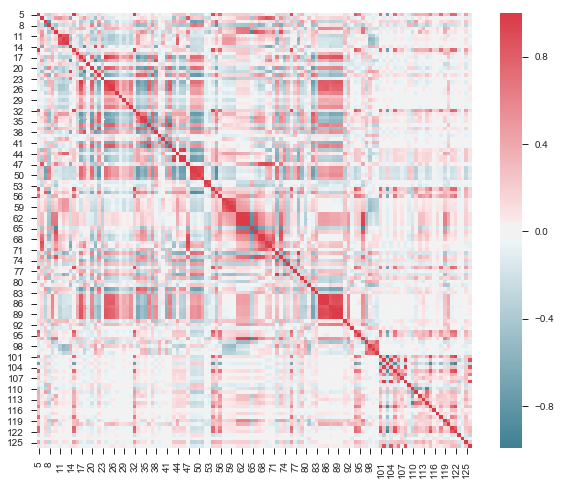

In [12]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataframe.iloc[:,:-1].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<h2>(d) Coefficient of variation CV</h2>

In [13]:
s=[]
m=[]
cvlist=[]
#dataframe.index = np.arange(1, len(dataframe)+1)
#print(dataframe.shape[1])
#print(dataframe.iloc[:,122])
for i in range(0,dataframe.shape[1]-1):
    cvlist.append(dataframe.iloc[:,i].var()/dataframe.iloc[:,i].mean())
cv=pd.DataFrame({"Coefficient of variation":cvlist})
#print(cv)


from IPython.display import display, HTML
display(HTML(cv.to_html()))




,Coefficient of variation
0,0.279637
1,0.057841
2,0.357587
3,0.079015
4,0.283898
5,0.375306
6,0.056777
7,0.041733
8,0.082446
9,0.075875


<h2>(e) Scatter plots</h2>

C:\Users\RAHUL\Anaconda3\envs\py35\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


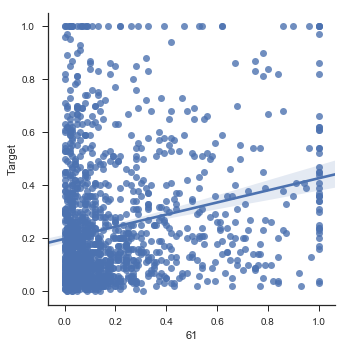

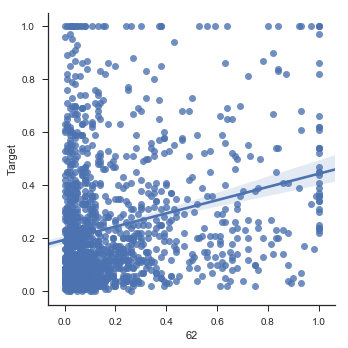

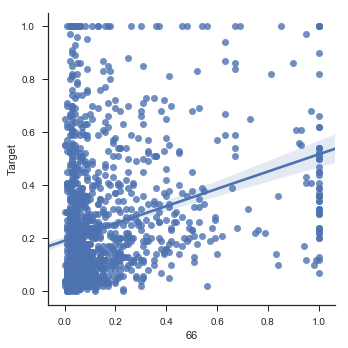

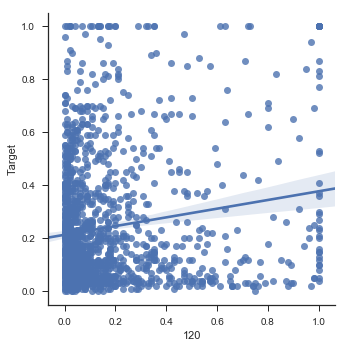

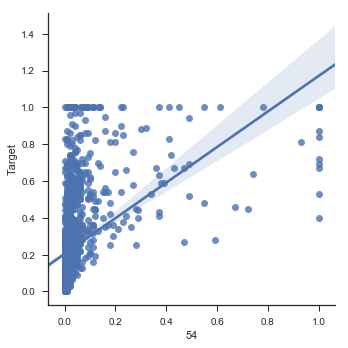

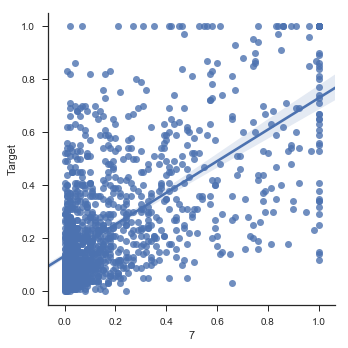

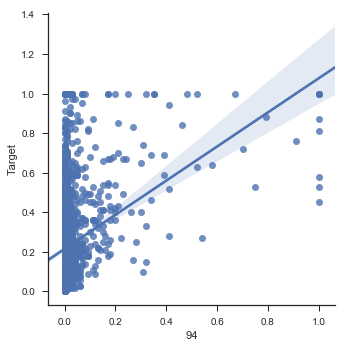

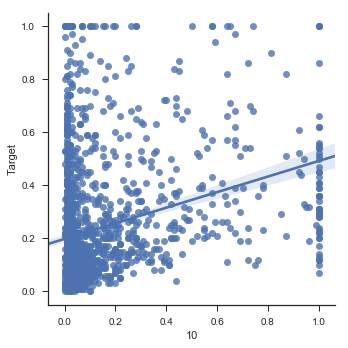

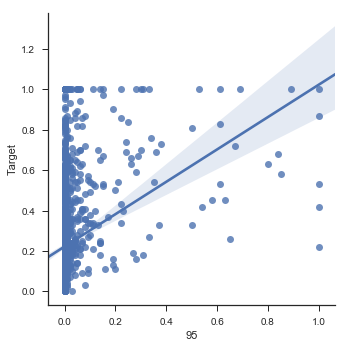

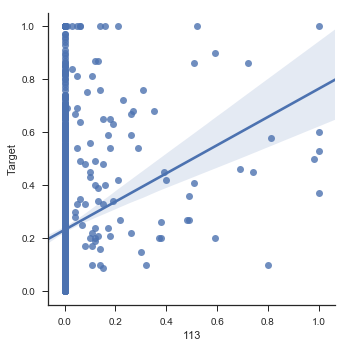

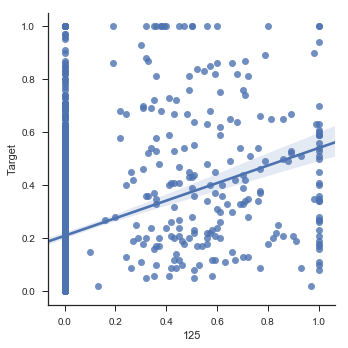

In [14]:

top_2_idx = np.argsort(cvlist)[-11:]
top_2_values = [cvlist[i] for i in top_2_idx]
#print(top_2_idx)

scatter_df=dataframe.iloc[:,top_2_idx]
#print(scatter_df.head())
sns.set(style="ticks",color_codes=True)
#print(scatter_df.iloc[:,0])
scatter_df.columns = scatter_df.columns.map(str)
#print(scatter_df.columns)
#f, axes = plt.subplots(1, 2)

scatter_df['Target']=y_train
for i in scatter_df.columns:
    if i!='Target':
        g=sns.lmplot(x=i, y='Target',data=scatter_df,sharey=False)
#sns.set(color_codes=True)
#ax = sns.regplot(x='61', y='125', data=scatter_df)

#sns.pairplot(scatter_df, kind="reg")


<pre>
Linear regression line has been fitted on all the scatter plots, which gives us the correlation.

Scatter plots are similar to line graphs in that they use horizontal and vertical axes to plot data points.  Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation .

Here, we see strong positive correlation between many of the features. 

</pre>

<h2>(e) Box plots</h2>

Text(0.5,0,'Indexed features')

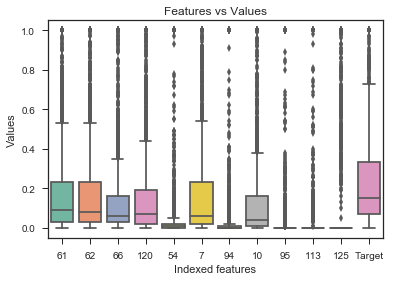

In [15]:
ax = sns.boxplot(data=scatter_df, orient="v", palette="Set2")
ax.set_title('Features vs Values')
ax.set_ylabel('Values')
ax.set_xlabel('Indexed features')

<h2>(f) Linear model using least squares</h2>

In [16]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print('Mean squared test error : ', mean_squared_error(y_test, y_pred))



Mean squared test error :  0.01797697257164362


<h2>(g) Ridge regression model</h2>

In [130]:
from sklearn.linear_model import RidgeCV

ridge_r=RidgeCV(store_cv_values=True)
ridge_r.fit(X_train, y_train) 

# Make predictions using the testing set
y_pred = ridge_r.predict(X_test)

# The mean squared error
print('Mean squared test error : ', mean_squared_error(y_test, y_pred))


Mean squared test error :  0.017630963071701356


<h2>(h) LASSO model</h2>

In [131]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import lasso_path
from sklearn import linear_model

LassoCV=linear_model.LassoCV(tol=0.00013)
LassoCV.fit(X_train, y_train) 

# Make predictions using the testing set
y_pred = LassoCV.predict(X_test)

print('Unnormalized LassoCV : ')
print('====================')
# The mean squared error
print('Mean squared test error           : ', mean_squared_error(y_test, y_pred))

features=[]
for i in range(0,dataframe.shape[1]-1):
    if LassoCV.coef_[i]!=0:
        features.append(i)
        
print('Total number of selected features : ',len(features))
print('Feature list by column numbers    : ',features)

LassoCV=linear_model.LassoCV(normalize=True,tol=0.00034)
LassoCV.fit(X_train, y_train) 

# Make predictions using the testing set
y_pred = LassoCV.predict(X_test)

# The mean squared error
print('')

print('Normalized LassoCV : ')
print('====================')

print("Mean squared test error           : ", mean_squared_error(y_test, y_pred))

features=[]
for i in range(0,dataframe.shape[1]-1):
    if LassoCV.coef_[i]!=0:
        features.append(i)
        
print('Total number of selected features : ',len(features))
print('Feature list by column numbers    : ',features)
print('')
print('The test error for both unnormalized and normalized is almost same, but the number of features is greatly reduced in the nomalized version of LassoCV.')


Unnormalized LassoCV : 
Mean squared test error           :  0.017562937954615554
Total number of selected features :  45
Feature list by column numbers    :  [2, 7, 11, 13, 14, 15, 17, 18, 22, 23, 24, 25, 26, 28, 33, 38, 44, 45, 46, 48, 50, 59, 67, 68, 69, 71, 72, 74, 75, 76, 78, 82, 85, 86, 88, 90, 91, 94, 101, 102, 114, 115, 119, 120, 121]

Normalized LassoCV : 
Mean squared test error           :  0.017424186398454396
Total number of selected features :  32
Feature list by column numbers    :  [2, 3, 7, 11, 15, 17, 18, 23, 24, 25, 38, 44, 45, 48, 50, 68, 69, 71, 72, 74, 75, 86, 88, 90, 91, 94, 99, 102, 104, 108, 119, 121]

The test error for both unnormalized and normalized is almost same, but the number of features is greatly reduced in the nomalized version of LassoCV.


<h2>(i) PCR model </h2>


Number of principal components in regression :  97
Mean squared test error                      :  0.017424186398454396


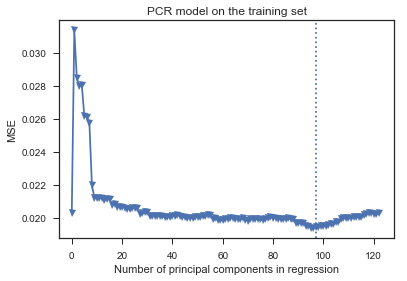

In [132]:
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pca = PCA()
X_reduced_train = pca.fit_transform(scale(X_train))
#print((X_reduced.shape))
n = len(X_reduced_train)
kf_5 = cross_validation.KFold(n, n_folds=5, shuffle=True, random_state=1)
regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*cross_validation.cross_val_score(regr, X_train, y_train.ravel(), cv=kf_5, scoring='neg_mean_squared_error').mean()
mse.append(score)

for i in np.arange(1, 123):
    score = -1*cross_validation.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_5, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('PCR model on the training set')
plt.axvline(np.argmin(mse)+1,
            linestyle=':', label='n_components chosen')
plt.xlim(xmin=-5)
print('Number of principal components in regression : ',np.argmin(mse)+1)

X_reduced_test = pca.transform(scale(X_test))[:,:np.argmin(mse)+1]

# Train regression model on training data
regr = LinearRegression()
regr.fit(X_reduced_train[:,:np.argmin(mse)+1], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)

print("Mean squared test error                      : ", mean_squared_error(y_test, y_pred))



<h2>(j) L1 penalized gradient boosting tree</h2>


In [85]:
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

'''
#print(X_train.iloc[298])
kf = KFold(n_splits=5, shuffle=False, random_state=1)
for k, (train_index, test_index) in enumerate(kf.split(X_train, y_train)):
    #print(train_index)
    #print(test_index)
    X_train_K, X_test_K = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_K, y_test_K = y_train.iloc[train_index], y_train.iloc[test_index]

    xgb_model = xgb.XGBRegressor().fit(X_train_K, y_train_K)
    predictions = xgb_model.predict(X_test_K)
    actuals = y_test_K
    print(mean_squared_error(actuals, predictions))

print("Parameter optimization")
y = y_train
X = X_train
xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
clf.fit(X,y)
print(clf.best_score_)
print(clf.best_params_)
'''




GridSearchCV = GridSearchCV(cv=5,
       estimator=xgb.XGBRegressor(),
       param_grid={'reg_alpha': np.linspace(np.float_power(10, -4), np.float_power(10, 1), 20)},
        refit=True, scoring='neg_mean_squared_error', verbose=1)


GridSearchCV.fit(X_train, y_train)

print('GridSearchCV.best_params_ : ')
print('=========================')
print(GridSearchCV.best_params_)
print('')
print('GridSearchCV.grid_scores_ : ')
print('=========================')
print(GridSearchCV.grid_scores_)
print('')
print('GridSearchCV.best_score_ : ')
print('========================')
print(GridSearchCV.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


GridSearchCV.best_params_ : 
{'reg_alpha': 0.0001}

GridSearchCV.grid_scores_ : 
[mean: -0.02061, std: 0.00299, params: {'reg_alpha': 0.0001}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 0.5264105263157894}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 1.052721052631579}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 1.5790315789473683}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 2.105342105263158}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 2.6316526315789477}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 3.157963157894737}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 3.684273684210526}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 4.210584210526315}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 4.736894736842105}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 5.263205263157895}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 5.7895157894736835}, mean: -0.02061, std: 0.00299, params: {'reg_alpha': 6.3158263

C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


<h1>2. Tree based methods</h1>

<h2> (b) Data preparation</h2>


<h3>i.) Train_test split data, imputation</h3>
The techniques used for dealing with missing values are known as imputation techniques.  Examples include mean, median, mode, ffill, bfill, pad etc.


In [2]:
dataframe1 = pd.read_csv("Dataset/aps_failure_training_set.csv",skiprows=20,na_values=["na"])
dataframe1['class'] = dataframe1['class'].map({'pos': 1, 'neg': 0})

#Data imputation technique to deal with the missing values in the data set.
dataframe1.fillna(dataframe1.median(),inplace=True) 

from IPython.display import display, HTML
display(HTML(dataframe1.head().to_html()))




dataframe2 = pd.read_csv("Dataset/aps_failure_test_set.csv",skiprows=20,na_values=["na"])
dataframe2['class'] = dataframe2['class'].map({'pos': 1, 'neg': 0})

#Data imputation technique to deal with the missing values in the data set.
dataframe2.fillna(dataframe2.median(),inplace=True) 

from IPython.display import display, HTML
display(HTML(dataframe2.head().to_html()))


X_train = dataframe1.iloc[:,1:]
X_test = dataframe2.iloc[:,1:]
y_train= dataframe1.iloc[:,:1]
y_test = dataframe2.iloc[:,:1]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.utils import shuffle

dataframe1['class'] = dataframe1['class'].map({1: 'pos', 0:'neg'})
#dataframe1.to_csv('train_df.csv', sep='\t',index=False)
temp_df=X_train
temp_df['class']=y_train
temp_df = shuffle(temp_df)
temp_df=temp_df.iloc[:6000,:]

#print(temp_df.head())
import arff
arff.dump('Dataset/weka_train.arff'
          ,temp_df.values
         , relation='relation name'
         , names=temp_df.columns)

dataframe1['class'] = dataframe1['class'].map({'pos': 1, 'neg': 0})


dataframe2['class'] = dataframe2['class'].map({1: 'pos', 0:'neg'})
#dataframe1.to_csv('train_df.csv', sep='\t',index=False)
temp_df=X_test
temp_df['class']=y_test
temp_df=temp_df.iloc[:6000,:]

temp_df=temp_df.iloc[:6000,:]
#print(temp_df.head())
import arff
arff.dump('Dataset/weka_test.arff'
          ,temp_df.values
         , relation='relation name'
         , names=temp_df.columns)

dataframe2['class'] = dataframe2['class'].map({'pos': 1, 'neg': 0})

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0.0,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,0.0,37250.0,1432864.0,3664156.0,1007684.0,25896.0,0.0,2551696.0,0.0,0.0,0.0,0.0,0.0,4933296.0,3655166.0,1766008.0,1132040.0,0.0,0.0,0.0,0.0,1012.0,268.0,0.0,0.0,0.0,0.0,0.0,469014.0,4239660.0,703300.0,755876.0,0.0,5374.0,2108.0,4114.0,12348.0,615248.0,5526276.0,2378.0,4.0,0.0,0.0,2328746.0,1022304.0,415432.0,287230.0,310246.0,681504.0,1118814.0,3574.0,0.0,0.0,6700214.0,0.0,10.0,108.0,50.0,2551696.0,97518.0,947550.0,799478.0,330760.0,353400.0,299160.0,305200.0,283680.0,288320.0,305100.0,320400.0,178540.0,76698.08,6700214.0,6700214.0,6599892.0,43566.0,68656.0,54064.0,638360.0,6167850.0,1209600.0,246244.0,2.0,96.0,0.0,5245752.00,0.0,916567.68,6.0,1924.0,0.0,0.0,0.0,118196.0,1309472.0,3247182.0,1381362.0,98822.0,11208.0,1608.0,220.0,240.0,6700214.0,0.0,10476.0,1226.0,267998.0,521832.0,428776.0,4015854.0,895240.0,26330.0,118.0,0.0,532.0,734.0,4122704.0,51288.0,0.0,532572.0,0.0,18.0,5330690.0,4732.0,1126.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62282.0,85908.0,32790.0,0.0,0.0,202710.0,37928.0,14745580.0,1876644.0,0.0,0.0,0.0,0.0,2801180.0,2445.80,2712.0,965866.0,1706908.0,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0,33058,0.0,0.000000e+00,126.0,0.0,0.0,0.0,0.0,0.0,0.0,18254.0,653294.0,1720800.0,516724.0,31642.0,0.0,1393352.0,0.0,68.0,0.0,0.0,0.0,2560898.0,2127150.0,1084598.0,338544.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71510.0,772720.0,1996924.0,99560.0,0.0,7336.0,7808.0,13776.0,13086.0,1010074.0,1873902.0,14726.0,6.0,0.0,0.0,1378576.0,447166.0,199512.0,154298.0,137280.0,138668.0,165908.0,229652.0,87082.0,4708.0,3646660.0,86.0,454.0,364.0,350.0,1393352.0,49028.0,688314.0,392208.0,341420.0,359780.0,366560.0,251400.0,270660.0,288320.0,305100.0,320400.0,6700.0,33057.51,3646660.0,3646660.0,3582034.0,17733.0,260120.0,115626.0,6900.0,2942850.0,1209600.0,0.0,2.0,46.0,0.0,2291079.36,0.0,643536.96,0.0,0.0,0.0,0.0,38.0,98644.0,1179502.0,1286736.0,336388.0,36294.0,5192.0,56.0,8.0,0.0,3646660.0,0.0,6160.0,796.0,164860.0,350066.0,272956.0,1837600.0,301242.0,9148.0,22.0,0.0,210.0,278.0,1181117.0,44465.0,0.0,202.0,0.0,0.0,1734472.0,3312.0,522.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33736.0,36946.0,5936.0,0.0,0.0,103330.0,16254.0,4510080.0,868538.0,0.0,0.0,0.0,0.0,3477820.0,2211.76,2334.0,664504.0,824154.0,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0,41040,0.0,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1648.0,370592.0,1883374.0,292936.0,12016.0,0.0,1234132.0,0.0,0.0,0.0,0.0,0.0,2371990.0,2173634.0,300796.0,153698.0,0.0,0.0,0.0,0.0,358.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,870456.0,239798.0,1450312.0,0.0,1620.0,1156.0,1228.0,34250.0,1811606.0,710672.0,34.0,0.0,0.0,0.0,790690.0,672026.0,332340.0,254892.0,189596.0,135758.0,103552.0,81666.0,46.0,0.0,2673338.0,128.0,202.0,5

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,1846.0,0.0,0.0,0.0,3976.0,0.0,0.0,0.0,1520.0,2374.0,11516.0,9480.0,111258.0,470.0,0.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13124.0,2.0,1956.0,434.0,76.0,174.0,190.0,6198.0,1148.0,2948.0,2.0,0.0,8762.0,2566.0,480.0,380.0,196.0,516.0,86.0,66.0,74.0,0.0,124340.0,4.0,6.0,4.0,0.0,3976.0,318.0,107662.0,3458.0,211310.0,223460.0,239010.0,251620.0,268010.0,284840.0,298660.0,311820.0,110980.0,59.53,124340.0,124340.0,184970.0,54.0,686.0,12246.0,123880.0,13196.0,1209600.0,598.0,0.0,6.0,0.0,5913.60,0.00,5851.20,6.0,30.0,0.0,2.0,5512.0,4674.0,1388.0,1508.0,38.0,4.0,0.0,0.0,8.0,12.0,124340.0,0.0,1550.0,14.0,36.0,26.0,920.0,430.0,7650.0,2294.0,206.0,0.0,22.0,42.0,5336.0,1276.0,0.0,0.0,0.0,0.0,6598.0,70.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,1100.0,574.0,232.0,66.0,780.0,882.0,0.0,4.0,0.0,0.0,0.0,465.50,90.0,7502.0,3156.0,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,3636.0,0.0,0.0,0.0,5244.0,0.0,60.0,0.0,0.0,0.0,23174.0,18166.0,23686.0,1270.0,0.0,0.0,0.0,0.0,12.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,16286.0,0.0,280.0,44.0,50.0,1274.0,866.0,3362.0,11102.0,0.0,0.0,0.0,12564.0,1756.0,638.0,276.0,172.0,132.0,812.0,308.0,192.0,128.0,46894.0,4.0,2.0,38.0,0.0,5244.0,360.0,20520.0,3134.0,211310.0,223460.0,239010.0,251620.0,268010.0,284840.0,298660.0,311820.0,23320.0,81.89,46894.0,46894.0,48324.0,68.0,0.0,4486.0,46480.0,17050.0,1209600.0,726.0,2.0,4.0,0.0,7224.96,0.00,7768.32,0.0,42.0,0.0,0.0,4.0,7064.0,6200.0,2452.0,1246.0,12.0,0.0,0.0,14.0,54.0,46894.0,0.0,2202.0,28.0,114.0,350.0,700.0,1708.0,9622.0,2174.0,80.0,0.0,80.0,206.0,7802.0,1466.0,0.0,0.0,0.0,0.0,7918.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,0.0,3996.0,584.0,200.0,62.0,37580.0,3756.0,6368.0,36.0,0.0,0.0,0.0,2.86,102.0,10040.0,3310.0,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,452706.0,25130.0,520.0,0.0,1891670.0,0.0,0.0,0.0,77898.0,110548.0,3605894.0,3291610.0,959756.0,286536.0,0.0,0.0,0.0,0.0,106.0,340.0,0.0,0.0,0.0,0.0,0.0,24286.0,681260.0,2808472.0,474782.0,0.0,22984.0,894.0,1162.0,1304.0,1856.0,388700.0,3424812.0,123828.0,23260.0,0.0,1662580.0,667960.0,387998.0,226078.0,161558.0,148288.0,154908.0,220820.0,147744.0,210866.0,4644422.0,958.0,7848.0,3624.0,0.0,1891670.0,47066.0,692800.0,265492.0,336240.0,194360.0,245240.0,251620.0,268010.0,284840.0,298660.0,311820.0,175480.0,66002.89,4644422.0,4644422.0,4608738.0,22706.0,2272.0,95510.0,1006260.0,3991552.0,1209600.0,126310.0,0.0,104.0,0.0,3594885.12,0.00,374649.60,148.0,720.0,0.0,5154.0,174956.0,622312.0,1002504.0,793938.0,541734.0,345896.0,300806.0,201500.0,52.0,92.0,4644422.0,0.0,24818.0,964.0,162660.0,215004.0,21793

(60000, 170)
(16000, 170)
(60000, 1)
(16000, 1)


<h2>ii.) Coefficient of variation CV</h2>

In [154]:
s=[]
m=[]
cvlist=[]
#dataframe.index = np.arange(1, len(dataframe)+1)
#print(dataframe1.iloc[:,170])
#print(dataframe.iloc[:,122])
#print(dataframe1.shape[1])
for i in range(1,dataframe1.shape[1]):
    cvlist.append(dataframe1.iloc[:,i].var()/dataframe1.iloc[:,i].mean())
cv=pd.DataFrame({"Coefficient of variation":cvlist})
#print(cv)


from IPython.display import display, HTML
display(HTML(cv.to_html()))


,Coefficient of variation
0,3.564400e+05
1,1.752025e+01
2,1.794508e+09
3,8.562354e+09
4,3.827201e+03
5,3.999153e+03
6,1.892144e+06
7,1.198791e+06
8,2.625784e+06
9,6.550555e+06


<h2> (iii) Correlation matrix</h2>


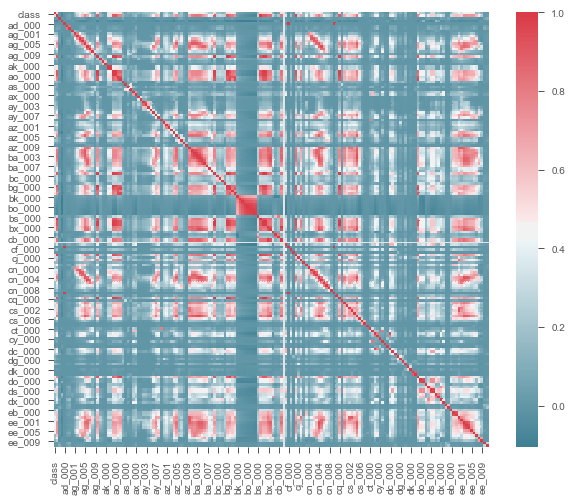

In [155]:
f, ax = plt.subplots(figsize=(10, 8))
corr = dataframe1.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

<h2>(iv) Scatter plots</h2>


C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Text(0.5,0.98,'Train set scatter plots')

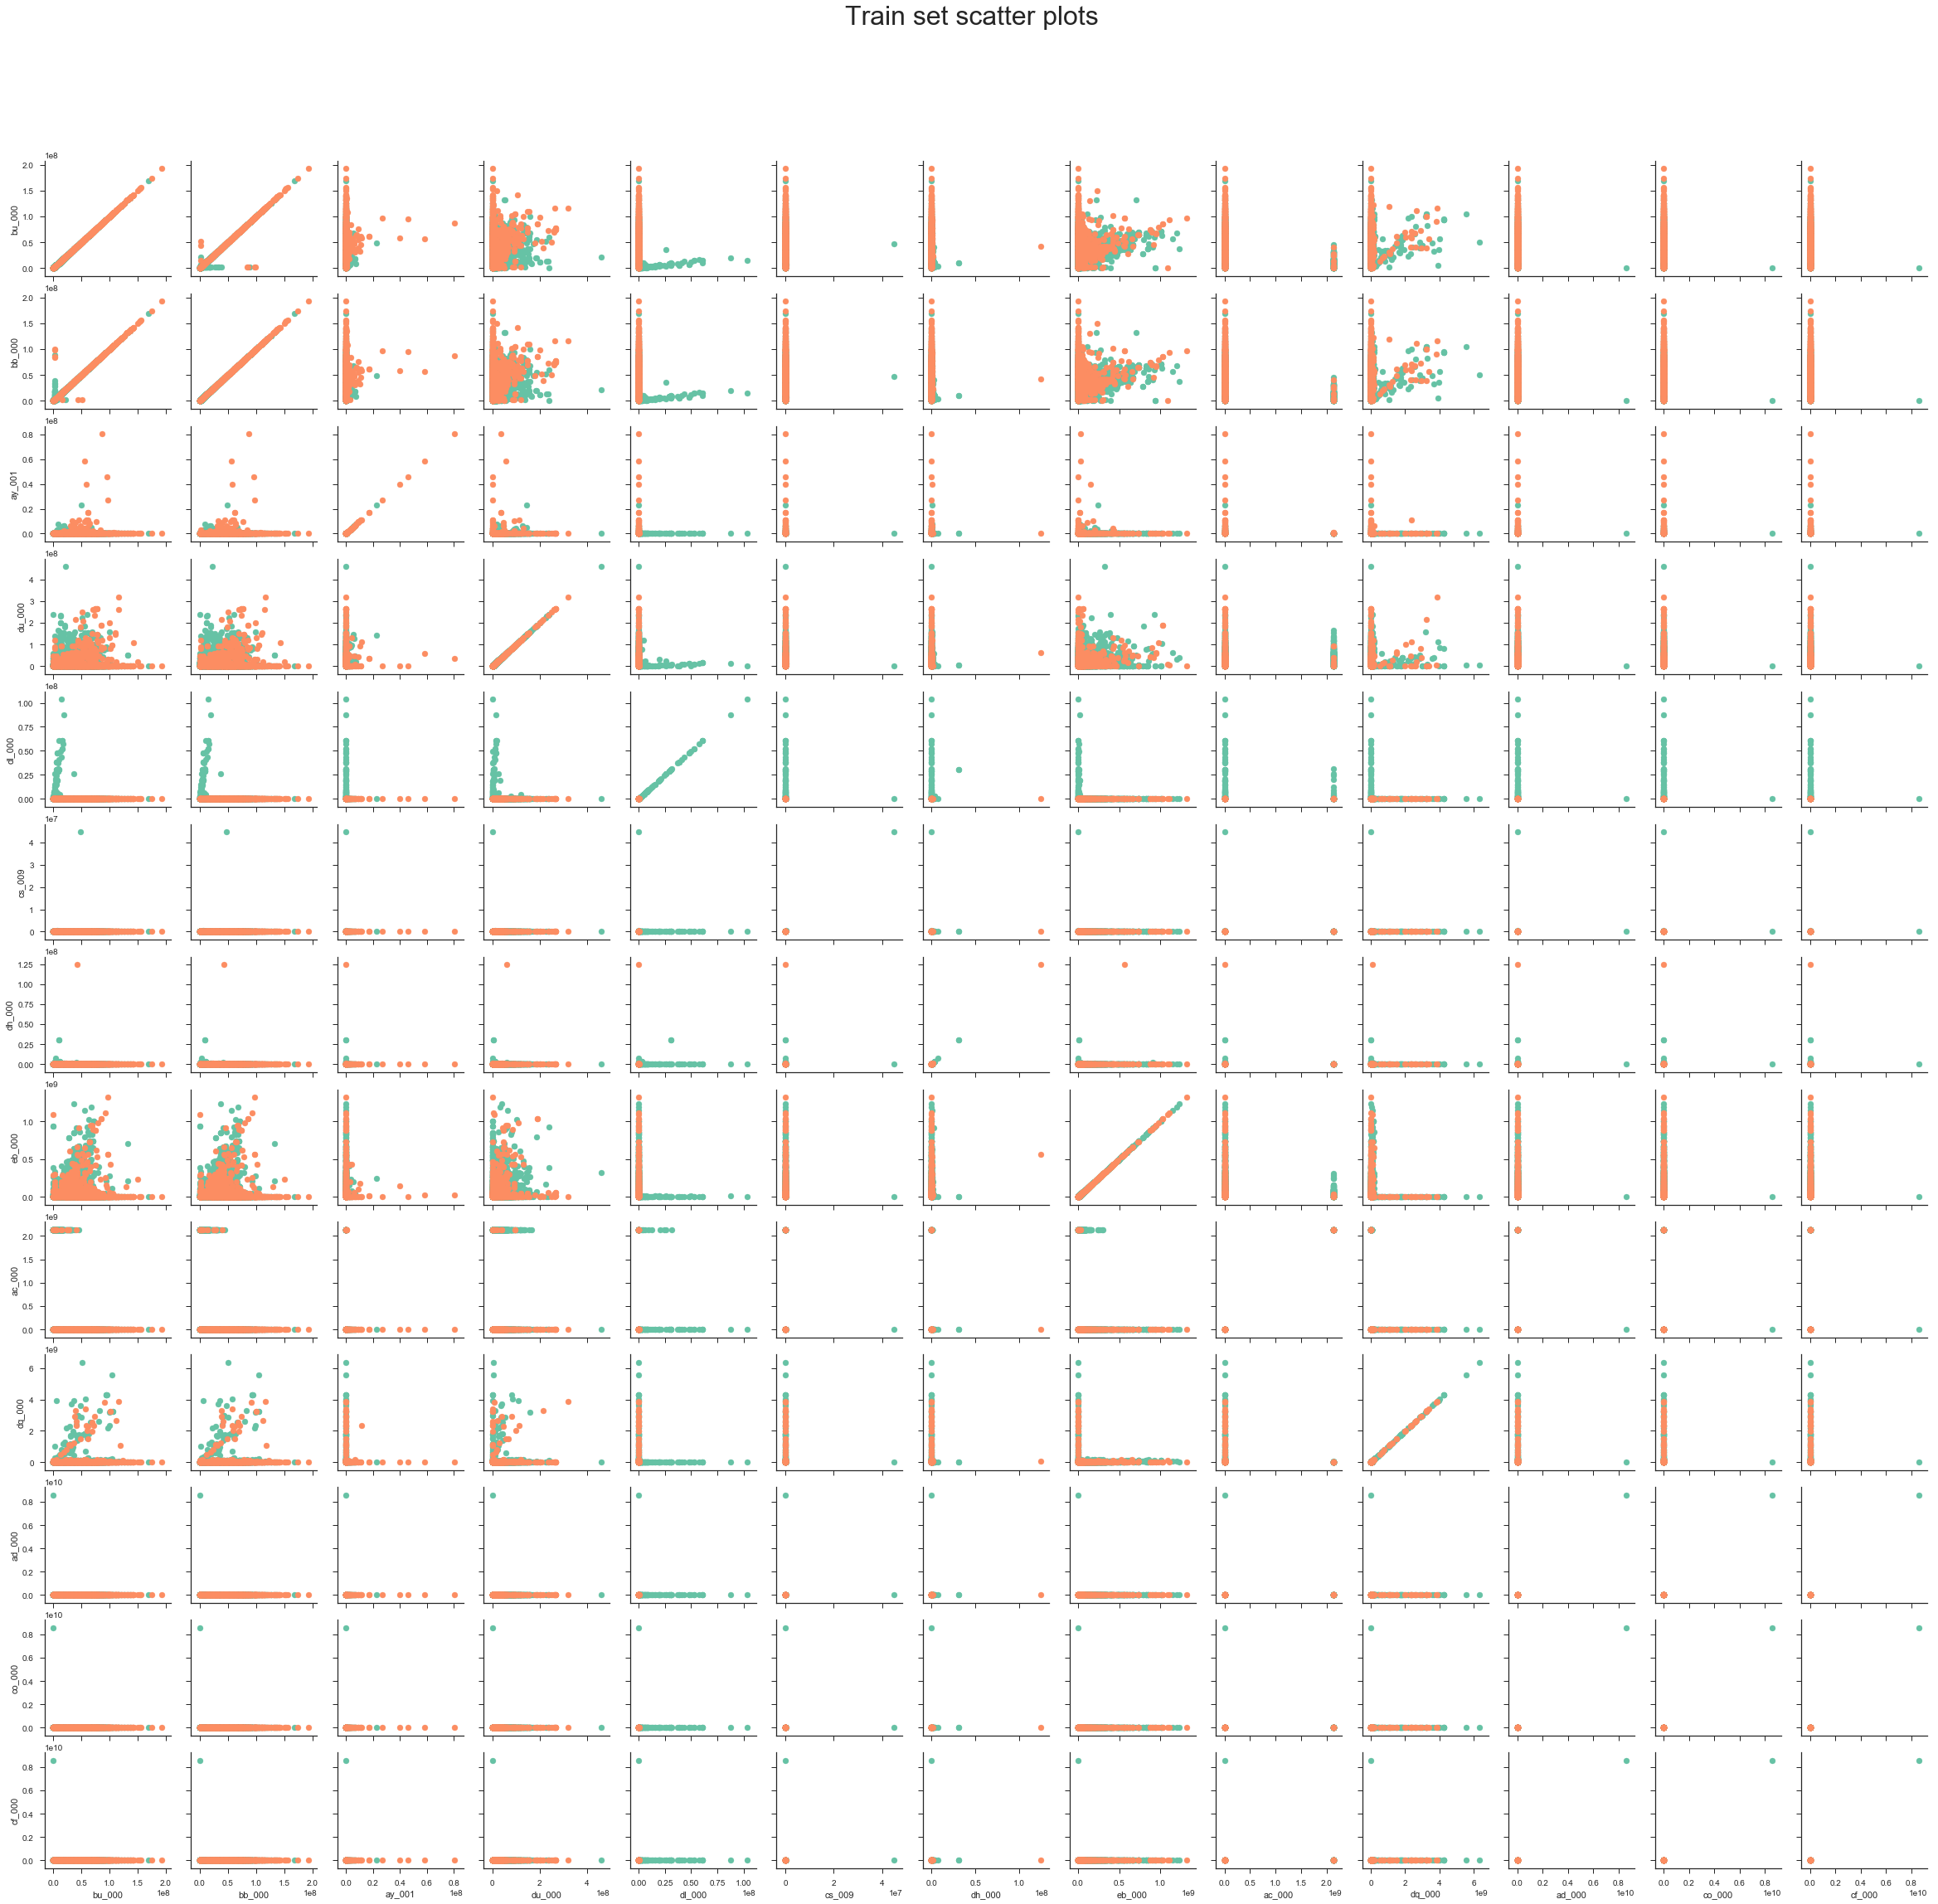

In [242]:
#plt.style.use('ggplot')
top_2_idx = np.argsort(cvlist)[-13:]
top_2_values = [cvlist[i] for i in top_2_idx]
#print(top_2_idx)
#print(X_train.shape)
scatter_df=X_train.iloc[:,top_2_idx]
#print(scatter_df.columns[])
sns.set(style="ticks", color_codes=True)
%matplotlib inline
#scatter_df=pd.DataFrame(dataframe1.iloc[:,top_2_idx], columns = dataframe1.feature_names)
#print(scatter_df.shape)

y= dataframe1['class'].map({1: True, 0: False})
#sns.set(style="ticks")
scatter_df['class']=y
temp=scatter_df
#temp.drop(columns=['class'],inplace=True)
#print(temp.columns)
#sns.pairplot(scatter_df, kind="reg")
#mdf = pd.melt(scatter_df, id_vars=temp.drop(columns=['class']), var_name=['class'])  

scatter=sns.PairGrid(scatter_df,hue='class', palette="Set2",vars=temp.drop(columns=['class']))
#scatter=scatter.map(plt.scatter)
scatter = scatter.map(plt.scatter)
plt.subplots_adjust(top=0.9)
scatter.fig.suptitle('Train set scatter plots',size=32)
#scatter = g.map_diag(plt.hist)

<pre>
Linear regression line can be fitted on all the scatter plots, which gives us the correlation.

Scatter plots are similar to line graphs in that they use horizontal and vertical axes to plot data points.  Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation .

Here, we see strong positive correlation between few of the features. 

</pre>

<h2>(iv) Box plots</h2>


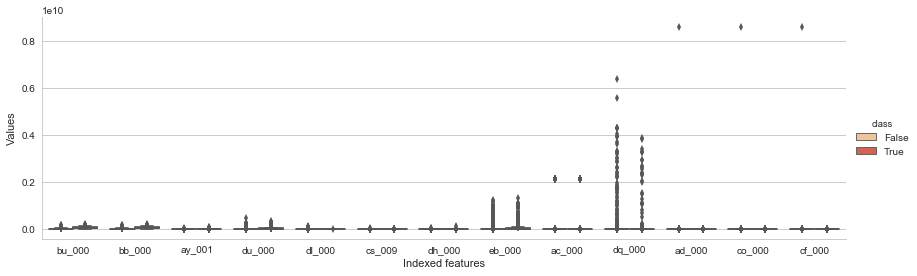

In [314]:
sns.set(style="whitegrid", color_codes=True)

df_long = pd.melt(scatter_df, "class", var_name="Indexed features", value_name="Values")
sns.factorplot("Indexed features", hue="class", y="Values", data=df_long, kind="box", size=4, aspect=3,palette="OrRd")


<h2>(v) Imbalance</h2>


In [337]:
print("Training set : ")
print('=============')
print('Number of 1s :',np.count_nonzero(y_train))
print('Number of 0s :',np.shape(y_train)[0]-np.count_nonzerso(y_train))
print('')
print("Test set : ")
print('=========')
print('Number of 1s :',np.count_nonzero(y_test))
print('Number of 0s :',np.shape(y_test)[0]-np.count_nonzero(y_test))

Training set : 
Number of 1s : 1000
Number of 0s : 59000

Test set : 
Number of 1s : 375
Number of 0s : 15625


<pre>
Yes, the data set is heavily imbalanced, as number of 0s are more than number of 1s.
<pre/>

<h2>(c) Random forest for training data with imbalance</h2>

In [377]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


rf = RandomForestClassifier(oob_score=True,class_weight=None)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)

print('Out-of-bag error estimate : ',1-rf.oob_score_)

mse = mean_squared_error(y_train,y_pred)

print('Training error            : ', mse)



C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Out-of-bag error estimate :  0.008633333333333382
Training error            :  0.00048333333333333334


<class 'numpy.ndarray'>


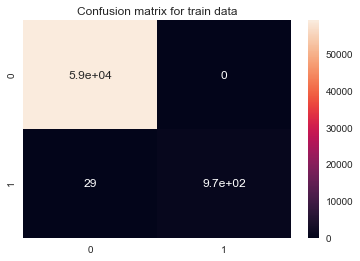

AUC :  0.9997543580274102


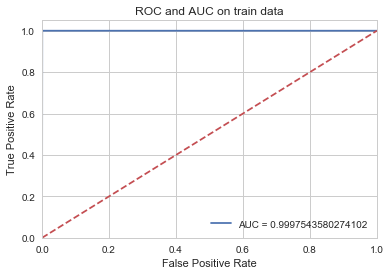

971
Misclassification rate :  0.00048333333333333334


In [381]:

conf_matrix = confusion_matrix(y_train,y_pred)
print(type(conf_matrix))
plt.figure()      
ax = sns.heatmap(conf_matrix,annot=True)
title='Confusion matrix for train data'
ax.set_title(title)
plt.show()

auc = roc_auc_score(y_pred,y_train)
print('AUC : ',auc)
fpr, tpr, thresh = roc_curve(y_pred,y_train)
plt.figure()

plt.plot(fpr, tpr, 'b', label = 'AUC = '+str(auc))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
title='ROC and AUC on train data' 
plt.title(title)
plt.show()
print(conf_matrix[1][1])
print("Misclassification rate : ",(conf_matrix[0][1]+conf_matrix[1][0])/np.shape(y_train)[0])

<h2>(c) Random forest for test data with imbalance</h2>


In [370]:
y_pred = rf.predict(X_test)

print('Out-of-bag error estimate : ',1-rf.oob_score_)

mse = mean_squared_error(y_test,y_pred)

print('Test error                : ', mse)

Out-of-bag error estimate :  0.009383333333333299
Test error                :  0.009


<class 'numpy.ndarray'>


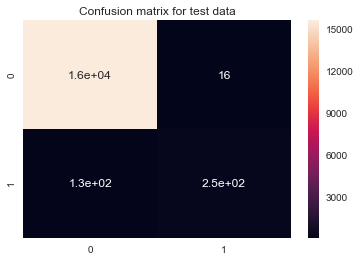

AUC :  0.965514900221826


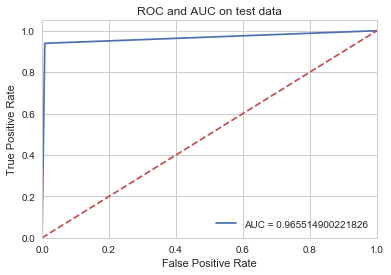

Misclassification rate :  0.009


In [374]:

conf_matrix = confusion_matrix(y_test,y_pred)
print(type(conf_matrix))
plt.figure()      
ax = sns.heatmap(conf_matrix,annot=True)
title='Confusion matrix for test data'
ax.set_title(title)
plt.show()

auc = roc_auc_score(y_pred,y_test)
print('AUC : ',auc)
fpr, tpr, thresh = roc_curve(y_pred,y_test)
plt.figure()

plt.plot(fpr, tpr, 'b', label = 'AUC = '+str(auc))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
title='ROC and AUC on test data' 
plt.title(title)
plt.show()
print("Misclassification rate : ",(conf_matrix[0][1]+conf_matrix[1][0])/np.shape(y_test)[0])

<h2>(d) Random forest for train data with no imbalance</h2>


<pre>
Class imbalance can be addressed in random forests by balancing the classes, resampling, downsampling and upsampling.
</pre>

In [536]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X_train, y_train)

X=X_resampled = pd.DataFrame(X_resampled)
y=y_resampled = pd.DataFrame(y_resampled)

rf = RandomForestClassifier(oob_score=True)
rf.fit(X, y)

y_pred = rf.predict(X)

print('Out-of-bag error estimate : ',1-rf.oob_score_)

mse = mean_squared_error(y,y_pred)

print('Training error            : ', mse)

C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAHUL\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable 

Out-of-bag error estimate :  0.06499999999999995
Training error            :  0.002


C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


<class 'numpy.ndarray'>


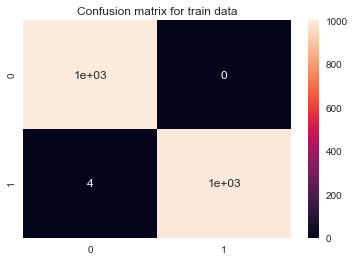

AUC :  0.998


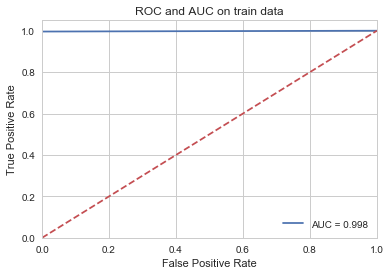

Misclassification rate :  6.666666666666667e-05


In [538]:

conf_matrix = confusion_matrix(y,y_pred)
print(type(conf_matrix))
plt.figure()      
ax = sns.heatmap(conf_matrix,annot=True)
title='Confusion matrix for train data'
ax.set_title(title)
plt.show()

auc = roc_auc_score(y,y_pred)
print('AUC : ',auc)
fpr, tpr, thresh = roc_curve(y,y_pred)
plt.figure()

plt.plot(fpr, tpr, 'b', label = 'AUC = '+str(auc))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
title='ROC and AUC on train data' 
plt.title(title)
plt.show()
#print(conf_matrix[0][0])

print("Misclassification rate : ",(conf_matrix[0][1]+conf_matrix[1][0])/np.shape(y_train)[0])

<h2>(d) Random forest for test data with no imbalance</h2>


In [523]:
rus = RandomUnderSampler(return_indices=True)
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X_train, y_train)

X_tr=X_resampled = pd.DataFrame(X_resampled)
y_tr=y_resampled = pd.DataFrame(y_resampled)

X_resampled, y_resampled, idx_resampled = rus.fit_sample(X_test, y_test)

X_te=X_resampled = pd.DataFrame(X_resampled)
y_te=y_resampled = pd.DataFrame(y_resampled)


rf = RandomForestClassifier(oob_score=True)
rf.fit(X_tr, y_tr)

y_pred = rf.predict(X_te)

print('Out-of-bag error estimate : ',1-rf.oob_score_)

mse = mean_squared_error(y_te,y_pred)

print('Training error            : ', mse)

C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Out-of-bag error estimate :  0.06699999999999995
Training error            :  0.028


C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\RAHUL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


<class 'numpy.ndarray'>


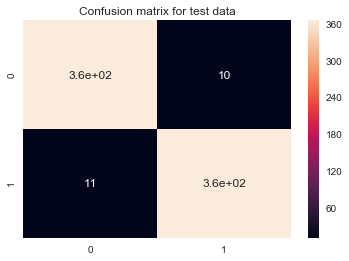

AUC :  0.9720000000000001


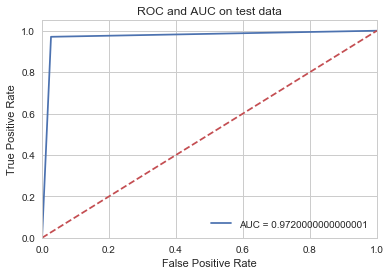

Misclassification rate :  0.0013125


In [525]:

conf_matrix = confusion_matrix(y_te,y_pred)
print(type(conf_matrix))
plt.figure()      
ax = sns.heatmap(conf_matrix,annot=True)
title='Confusion matrix for test data'
ax.set_title(title)
plt.show()

auc = roc_auc_score(y_te,y_pred)
print('AUC : ',auc)
fpr, tpr, thresh = roc_curve(y_te,y_pred)
plt.figure()

plt.plot(fpr, tpr, 'b', label = 'AUC = '+str(auc))
plt.legend(loc = 'lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
title='ROC and AUC on test data' 
plt.title(title)
plt.show()
print("Misclassification rate : ",(conf_matrix[0][1]+conf_matrix[1][0])/np.shape(y_test)[0])

<pre>
Resampling helps the model to reduce the imbalance and the error is reduced as compared to 2(c).

</pre>

<h2>(e) Model Trees for training set</h2>


INFO:weka.core.jvm:JVM already running, call jvm.stop() first


Summary  : 

Correctly Classified Instances       11922               99.35   %
Incorrectly Classified Instances        78                0.65   %
Kappa statistic                          0.7467
Mean absolute error                      0.0085
Root mean squared error                  0.0719
Relative absolute error                 31.0536 %
Root relative squared error             61.592  %
Total Number of Instances            12000     


Misclassification rate for training :  0.0065
AUC                  :  0.9798301707760567
weightedAreaUnderROC :  0.9798301707760568


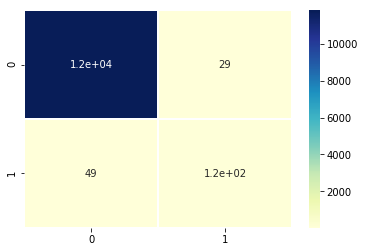

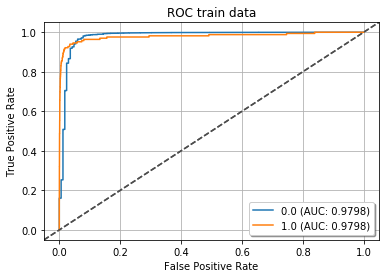

In [17]:
import weka.core.jvm as jvm
from weka.classifiers import Classifier
from weka.flow.control import Flow, Branch, Sequence
from weka.classifiers import FilteredClassifier
from weka.core.converters import Loader
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.filters import Filter
import seaborn as sns
import matplotlib as plt
import arff
from weka.core.converters import Loader

jvm.start(packages=True)

import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.classifiers import Classifier
from weka.plot.classifiers import plot_roc

from sklearn.utils import shuffle
import javabridge
#jvm.start()

#loader = Loader(classname="weka.core.converters.CSVLoader")
#data = loader.load_file("train_df.csv")


loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file("Dataset/weka_train.arff")

data.class_is_last()

#print(data)

cls = Classifier(classname="weka.classifiers.trees.LMT")

fc = FilteredClassifier()
fc.classifier = cls


fc.build_classifier(data)
#print(fc)
#print(fc.graph)
#plot_graph.plot_dot_graph(fc.graph)


evl = Evaluation(data)
evl.crossvalidate_model(fc, data, 10, Random(1))
Y_preds=evl.test_model(fc, data)
#print(Y_preds)
#print(evl)
print('Summary  : ')
print('=======')
print(evl.summary())


conf=evl.confusion_matrix 
#print(evl.percent_incorrect)

#print(conf)

#print('evl.percent_incorrect  :  ',evl.percent_incorrect)


#print(areaUnderROC(evl, class_index=[0, 1]))

sns.heatmap(conf,cmap="YlGnBu",annot=True,linewidths=.5)
area=javabridge.static_call(
"weka/classifiers/evaluation/ThresholdCurve", "getROCArea", "(Lweka/core/Instances;)D", data.jobject)



#print(evl.area_under_prc)

#print(evl.areaUnderROC(class_index=[0, 1]))

#print(" (AUC: %0.4f)" % area)
print('')
print("Misclassification rate for training : ",(conf[0][1]+conf[1][0])/np.shape(temp_df)[0])
import weka.plot.classifiers as pl2  

print("AUC                  : ",evl.area_under_roc(1))
print("weightedAreaUnderROC :  " + str(evl.weighted_area_under_roc))
pl2.plot_roc(evl, title="ROC train data", class_index=[0,1],wait=False)



<h2>(e) Model Trees for test data</h2>


INFO:weka.core.jvm:JVM already running, call jvm.stop() first


Summary  : 

Correctly Classified Instances       11836               98.6333 %
Incorrectly Classified Instances       164                1.3667 %
Kappa statistic                          0.5454
Mean absolute error                      0.0148
Root mean squared error                  0.1041
Relative absolute error                 45.3601 %
Root relative squared error             75.8662 %
Total Number of Instances            12000     


Misclassification rate for testing :  0.013666666666666667
AUC                  :  0.9666645118392375
weightedAreaUnderROC :  0.9666645118392375


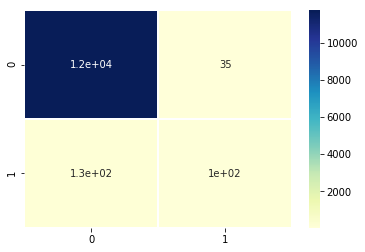

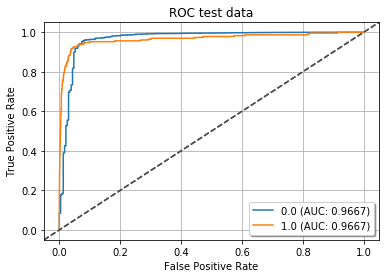

In [18]:
import weka.core.jvm as jvm
from weka.classifiers import Classifier
from weka.flow.control import Flow, Branch, Sequence
from weka.classifiers import FilteredClassifier
from weka.core.converters import Loader
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.filters import Filter
import seaborn as sns
import matplotlib as plt
import arff
from weka.core.converters import Loader
import weka.plot.graph as plot_graph

jvm.start(packages=True)

import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.classifiers import Classifier
from weka.plot.classifiers import plot_roc

import javabridge
#jvm.start()

#loader = Loader(classname="weka.core.converters.CSVLoader")
#data = loader.load_file("train_df.csv")


loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file("Dataset/weka_train.arff")
data_test=loader.load_file("Dataset/weka_test.arff")

data.class_is_last()
data_test.class_is_last()
#print(data)

cls = Classifier(classname="weka.classifiers.trees.LMT")

fc = FilteredClassifier()
fc.classifier = cls

fc.build_classifier(data)
#print(fc)
#print(fc.graph)
#plot_graph.plot_dot_graph(fc.graph)


evl = Evaluation(data)
evl.crossvalidate_model(fc, data, 10, Random(1))
Y_preds=evl.test_model(fc, data_test)
#print(Y_preds)
#print(evl)
print('Summary  : ')
print('=======')
print(evl.summary())


conf=evl.confusion_matrix 
#print(evl.percent_incorrect)
#print(conf)

#print('evl.percent_incorrect  :  ',evl.percent_incorrect)


#print(areaUnderROC(evl, class_index=[0, 1]))

sns.heatmap(conf,cmap="YlGnBu",annot=True,linewidths=.5)
area=javabridge.static_call(
"weka/classifiers/evaluation/ThresholdCurve", "getROCArea", "(Lweka/core/Instances;)D", data.jobject)



#print(evl.area_under_prc)

#print(evl.areaUnderROC(class_index=[0, 1]))

#print(" (AUC: %0.4f)" % area)
print('')
print("Misclassification rate for testing : ",(conf[0][1]+conf[1][0])/np.shape(temp_df)[0])
import weka.plot.classifiers as pl2  
#print(data.class_attribute.num_values)
print("AUC                  : ",evl.area_under_roc(1))
print("weightedAreaUnderROC :  " + str(evl.weighted_area_under_roc))
pl2.plot_roc(evl, title="ROC test data", class_index=[0,1],wait=False)

<h2>(f) SMOTE Model Trees for train data</h2>


In [4]:
import weka.core.jvm as jvm
from weka.classifiers import Classifier
from weka.flow.control import Flow, Branch, Sequence
from weka.classifiers import FilteredClassifier
from weka.core.converters import Loader
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.filters import Filter
import seaborn as sns
import matplotlib as plt
import arff
from weka.core.converters import Loader
import weka.plot.graph as plot_graph

jvm.start(packages=True)

import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.classifiers import Classifier
from weka.plot.classifiers import plot_roc


from imblearn.over_sampling import SMOTE 
from collections import Counter
sm = SMOTE(random_state=42)

#print(temp_df.columns)
#sampler = temp_df.imbalance.over_sampling.SMOTE()
#sampled = temp_df.fit_sample(sampler)

X_res, y_res = sm.fit_sample(X_train, y_train)
print('Resampled train dataset shape {}'.format(Counter(y_res)))

#print(X_res.shape)

#dataframe2['class'] = dataframe2['class'].map({1: 'pos', 0:'neg'})
#dataframe1.to_csv('train_df.csv', sep='\t',index=False)
temp_df=pd.DataFrame(X_res,columns=temp_df.columns)

temp_df['class']=y_res
print(temp_df.shape)
temp_df=shuffle(temp_df)
temp_df=temp_df.iloc[:1000,:]
#print(temp_df.head())
import arff
arff.dump('Dataset/smote_train.arff'
          ,temp_df.values
         , relation='relation name'
         , names=temp_df.columns)


X_res, y_res = sm.fit_sample(X_test, y_test)
print('Resampled test dataset shape {}'.format(Counter(y_res)))

#print(X_res.shape)

#dataframe2['class'] = dataframe2['class'].map({1: 'pos', 0:'neg'})
#dataframe1.to_csv('train_df.csv', sep='\t',index=False)
temp_df=pd.DataFrame(X_res,columns=temp_df.columns)

temp_df['class']=y_res
#print(temp_df)

temp_df=shuffle(temp_df)
temp_df=temp_df.iloc[:1000,:]
#print(temp_df.head())
import arff
arff.dump('Dataset/smote_test.arff'
          ,temp_df.values
         , relation='relation name'
         , names=temp_df.columns)






INFO:weka.core.jvm:JVM already running, call jvm.stop() first
C:\Users\RAHUL\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAHUL\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampled train dataset shape Counter({0: 59000, 1: 59000})
(118000, 171)


C:\Users\RAHUL\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\RAHUL\Anaconda3\envs\py35\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Resampled test dataset shape Counter({0: 15625, 1: 15625})


Summary  : 

Correctly Classified Instances        1941               97.05   %
Incorrectly Classified Instances        59                2.95   %
Kappa statistic                          0.941 
Mean absolute error                      0.043 
Root mean squared error                  0.15  
Relative absolute error                  8.6127 %
Root relative squared error             29.9988 %
Total Number of Instances             2000     


Misclassification rate for training :  0.059
AUC                  :  0.9919218469838627
weightedAreaUnderROC :  0.9919218469838627


DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\RAHUL\\Anaconda3\\envs\\py35\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000


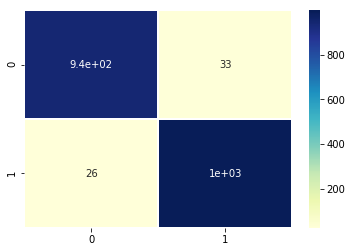

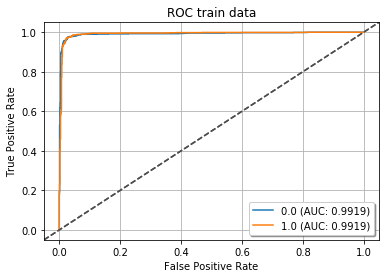

In [6]:
import javabridge
loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file("Dataset/smote_train.arff")

data.class_is_last()

#print(data)

cls = Classifier(classname="weka.classifiers.trees.LMT")

fc = FilteredClassifier()
fc.classifier = cls


fc.build_classifier(data)
#print(fc)
#print(fc.graph)
#plot_graph.plot_dot_graph(fc.graph)


evl = Evaluation(data)
evl.crossvalidate_model(fc, data, 10, Random(1))
Y_preds=evl.test_model(fc, data)
#print(Y_preds)
#print(evl)
print('Summary  : ')
print('=======')
print(evl.summary())


conf=evl.confusion_matrix 
#print(evl.percent_incorrect)J

#print(conf)

sns.heatmap(conf,cmap="YlGnBu",annot=True,linewidths=.5)
area=javabridge.static_call(
"weka/classifiers/evaluation/ThresholdCurve", "getROCArea", "(Lweka/core/Instances;)D", data.jobject)



#print(evl.area_under_prc)

#print(evl.areaUnderROC(class_index=[0, 1]))

#print(" (AUC: %0.4f)" % area)
print('')
print("Misclassification rate for training : ",(conf[0][1]+conf[1][0])/np.shape(temp_df)[0])
import weka.plot.classifiers as pl2  
#print(data.class_attribute.num_values)
print("AUC                  : ",evl.area_under_roc(1))
print("weightedAreaUnderROC :  " + str(evl.weighted_area_under_roc))
pl2.plot_roc(evl, title="ROC train data", class_index=[0,1],wait=False)

<h2>(f) SMOTE model tree for test data </h2>

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


Summary  : 

Correctly Classified Instances        1918               95.9    %
Incorrectly Classified Instances        82                4.1    %
Kappa statistic                          0.918 
Mean absolute error                      0.0532
Root mean squared error                  0.1763
Relative absolute error                 10.6433 %
Root relative squared error             35.2264 %
Total Number of Instances             2000     


Misclassification rate for testing :  0.082
AUC                  :  0.9894494187425148
weightedAreaUnderROC :  0.9894494187425148


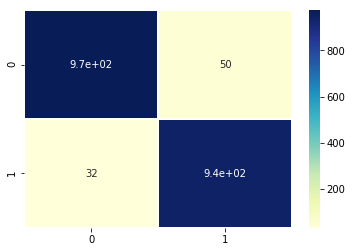

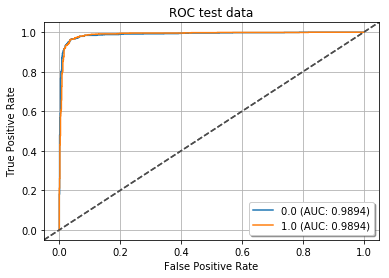

In [7]:
import weka.core.jvm as jvm
from weka.classifiers import Classifier
from weka.flow.control import Flow, Branch, Sequence
from weka.classifiers import FilteredClassifier
from weka.core.converters import Loader
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.filters import Filter
import seaborn as sns
import matplotlib as plt
import arff
from weka.core.converters import Loader
import weka.plot.graph as plot_graph

jvm.start(packages=True)

import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.classifiers import Classifier
from weka.plot.classifiers import plot_roc

import javabridge

loader = Loader(classname="weka.core.converters.ArffLoader")
data = loader.load_file("Dataset/smote_train.arff")
data_test=loader.load_file("Dataset/smote_test.arff")

data.class_is_last()
data_test.class_is_last()
#print(data)

cls = Classifier(classname="weka.classifiers.trees.LMT")

fc = FilteredClassifier()
fc.classifier = cls

fc.build_classifier(data)
#print(fc)
#print(fc.graph)
#plot_graph.plot_dot_graph(fc.graph)


evl = Evaluation(data)
evl.crossvalidate_model(fc, data, 10, Random(1))
Y_preds=evl.test_model(fc, data_test)
#print(Y_preds)
#print(evl)
print('Summary  : ')
print('=======')
print(evl.summary())


conf=evl.confusion_matrix 
#print(evl.percent_incorrect)
#print(conf)

#print('evl.percent_incorrect  :  ',evl.percent_incorrect)


#print(areaUnderROC(evl, class_index=[0, 1]))

sns.heatmap(conf,cmap="YlGnBu",annot=True,linewidths=.5)
area=javabridge.static_call(
"weka/classifiers/evaluation/ThresholdCurve", "getROCArea", "(Lweka/core/Instances;)D", data.jobject)



#print(evl.area_under_prc)

#print(evl.areaUnderROC(class_index=[0, 1]))

#print(" (AUC: %0.4f)" % area)
print('')
print("Misclassification rate for testing : ",(conf[0][1]+conf[1][0])/np.shape(temp_df)[0])
import weka.plot.classifiers as pl2  
#print(data.class_attribute.num_values)
print("AUC                  : ",evl.area_under_roc(1))
print("weightedAreaUnderROC :  " + str(evl.weighted_area_under_roc))
pl2.plot_roc(evl, title="ROC test data", class_index=[0,1],wait=False)

<pre>Clearly, using SMOTE has proven beneficial as the results are surprising.  AUC has increased when compared to 
uncompensated case.</pre>

<h2>3.) ISLR 6.8.3, 4.) ISLR 6.8.5</h2>

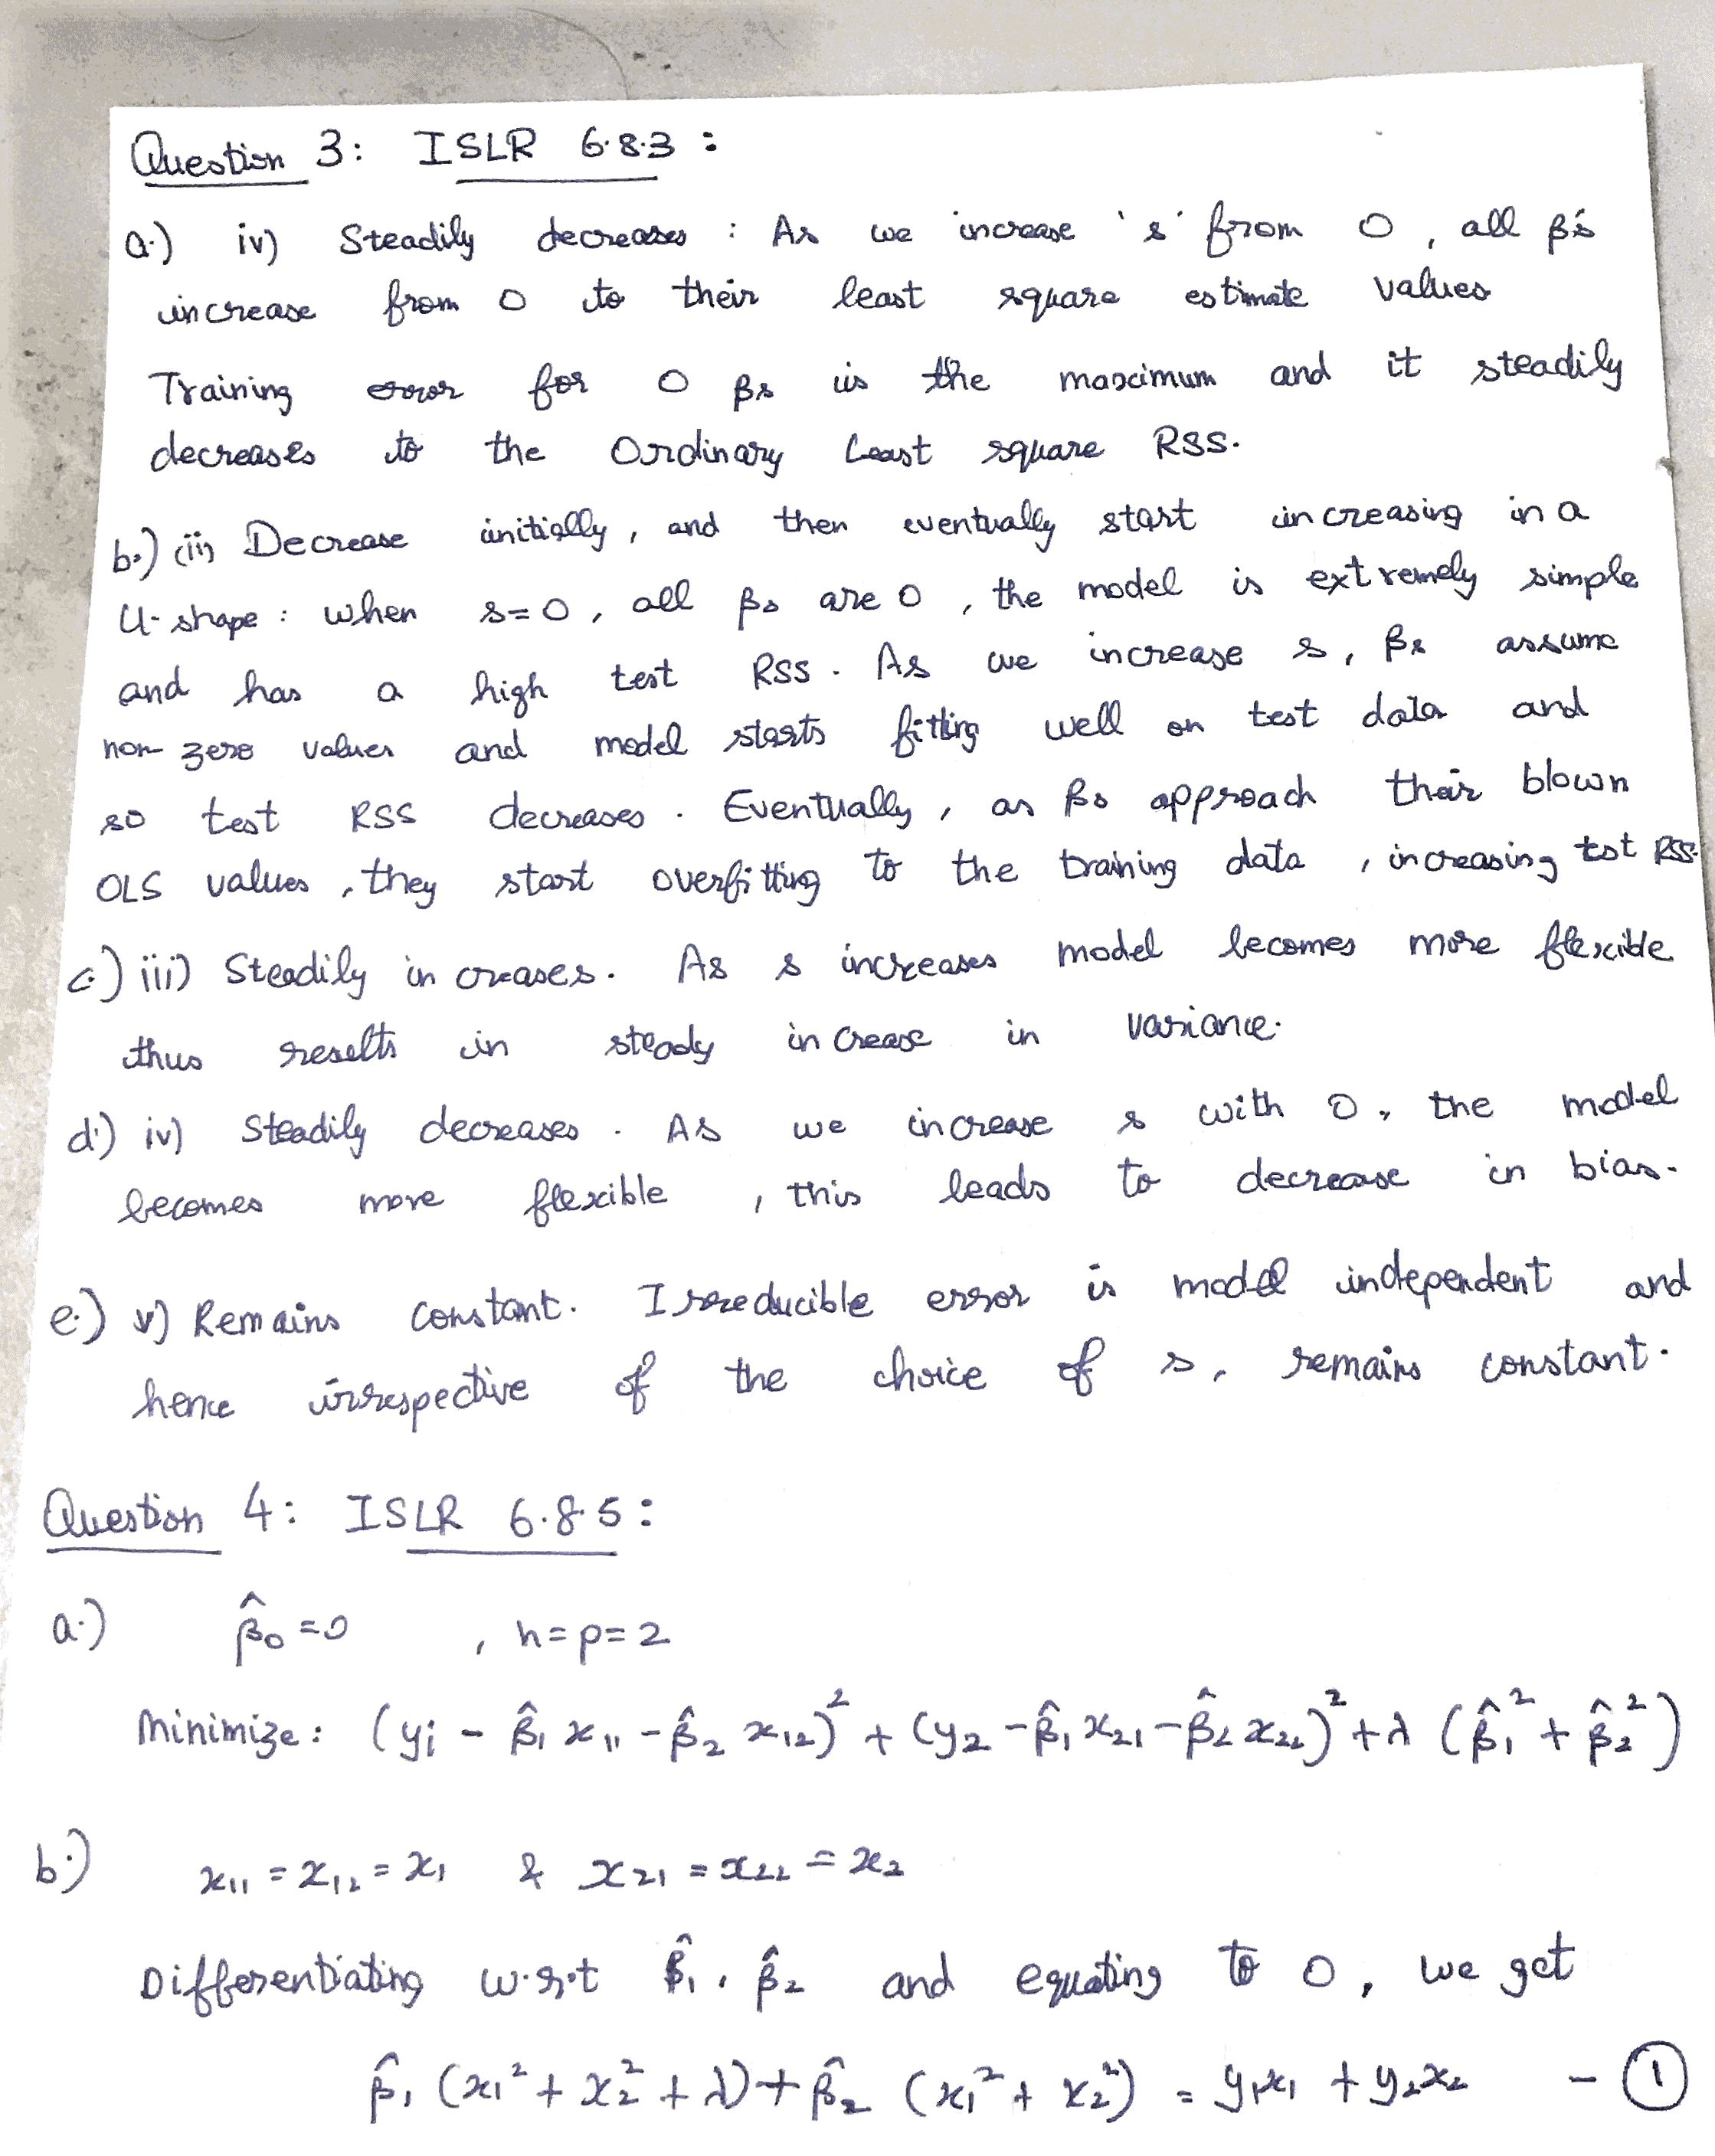

In [9]:
from IPython.display import Image
Image(filename='Page1.png')


<h2>5.) ISLR 8.4.5</h2>

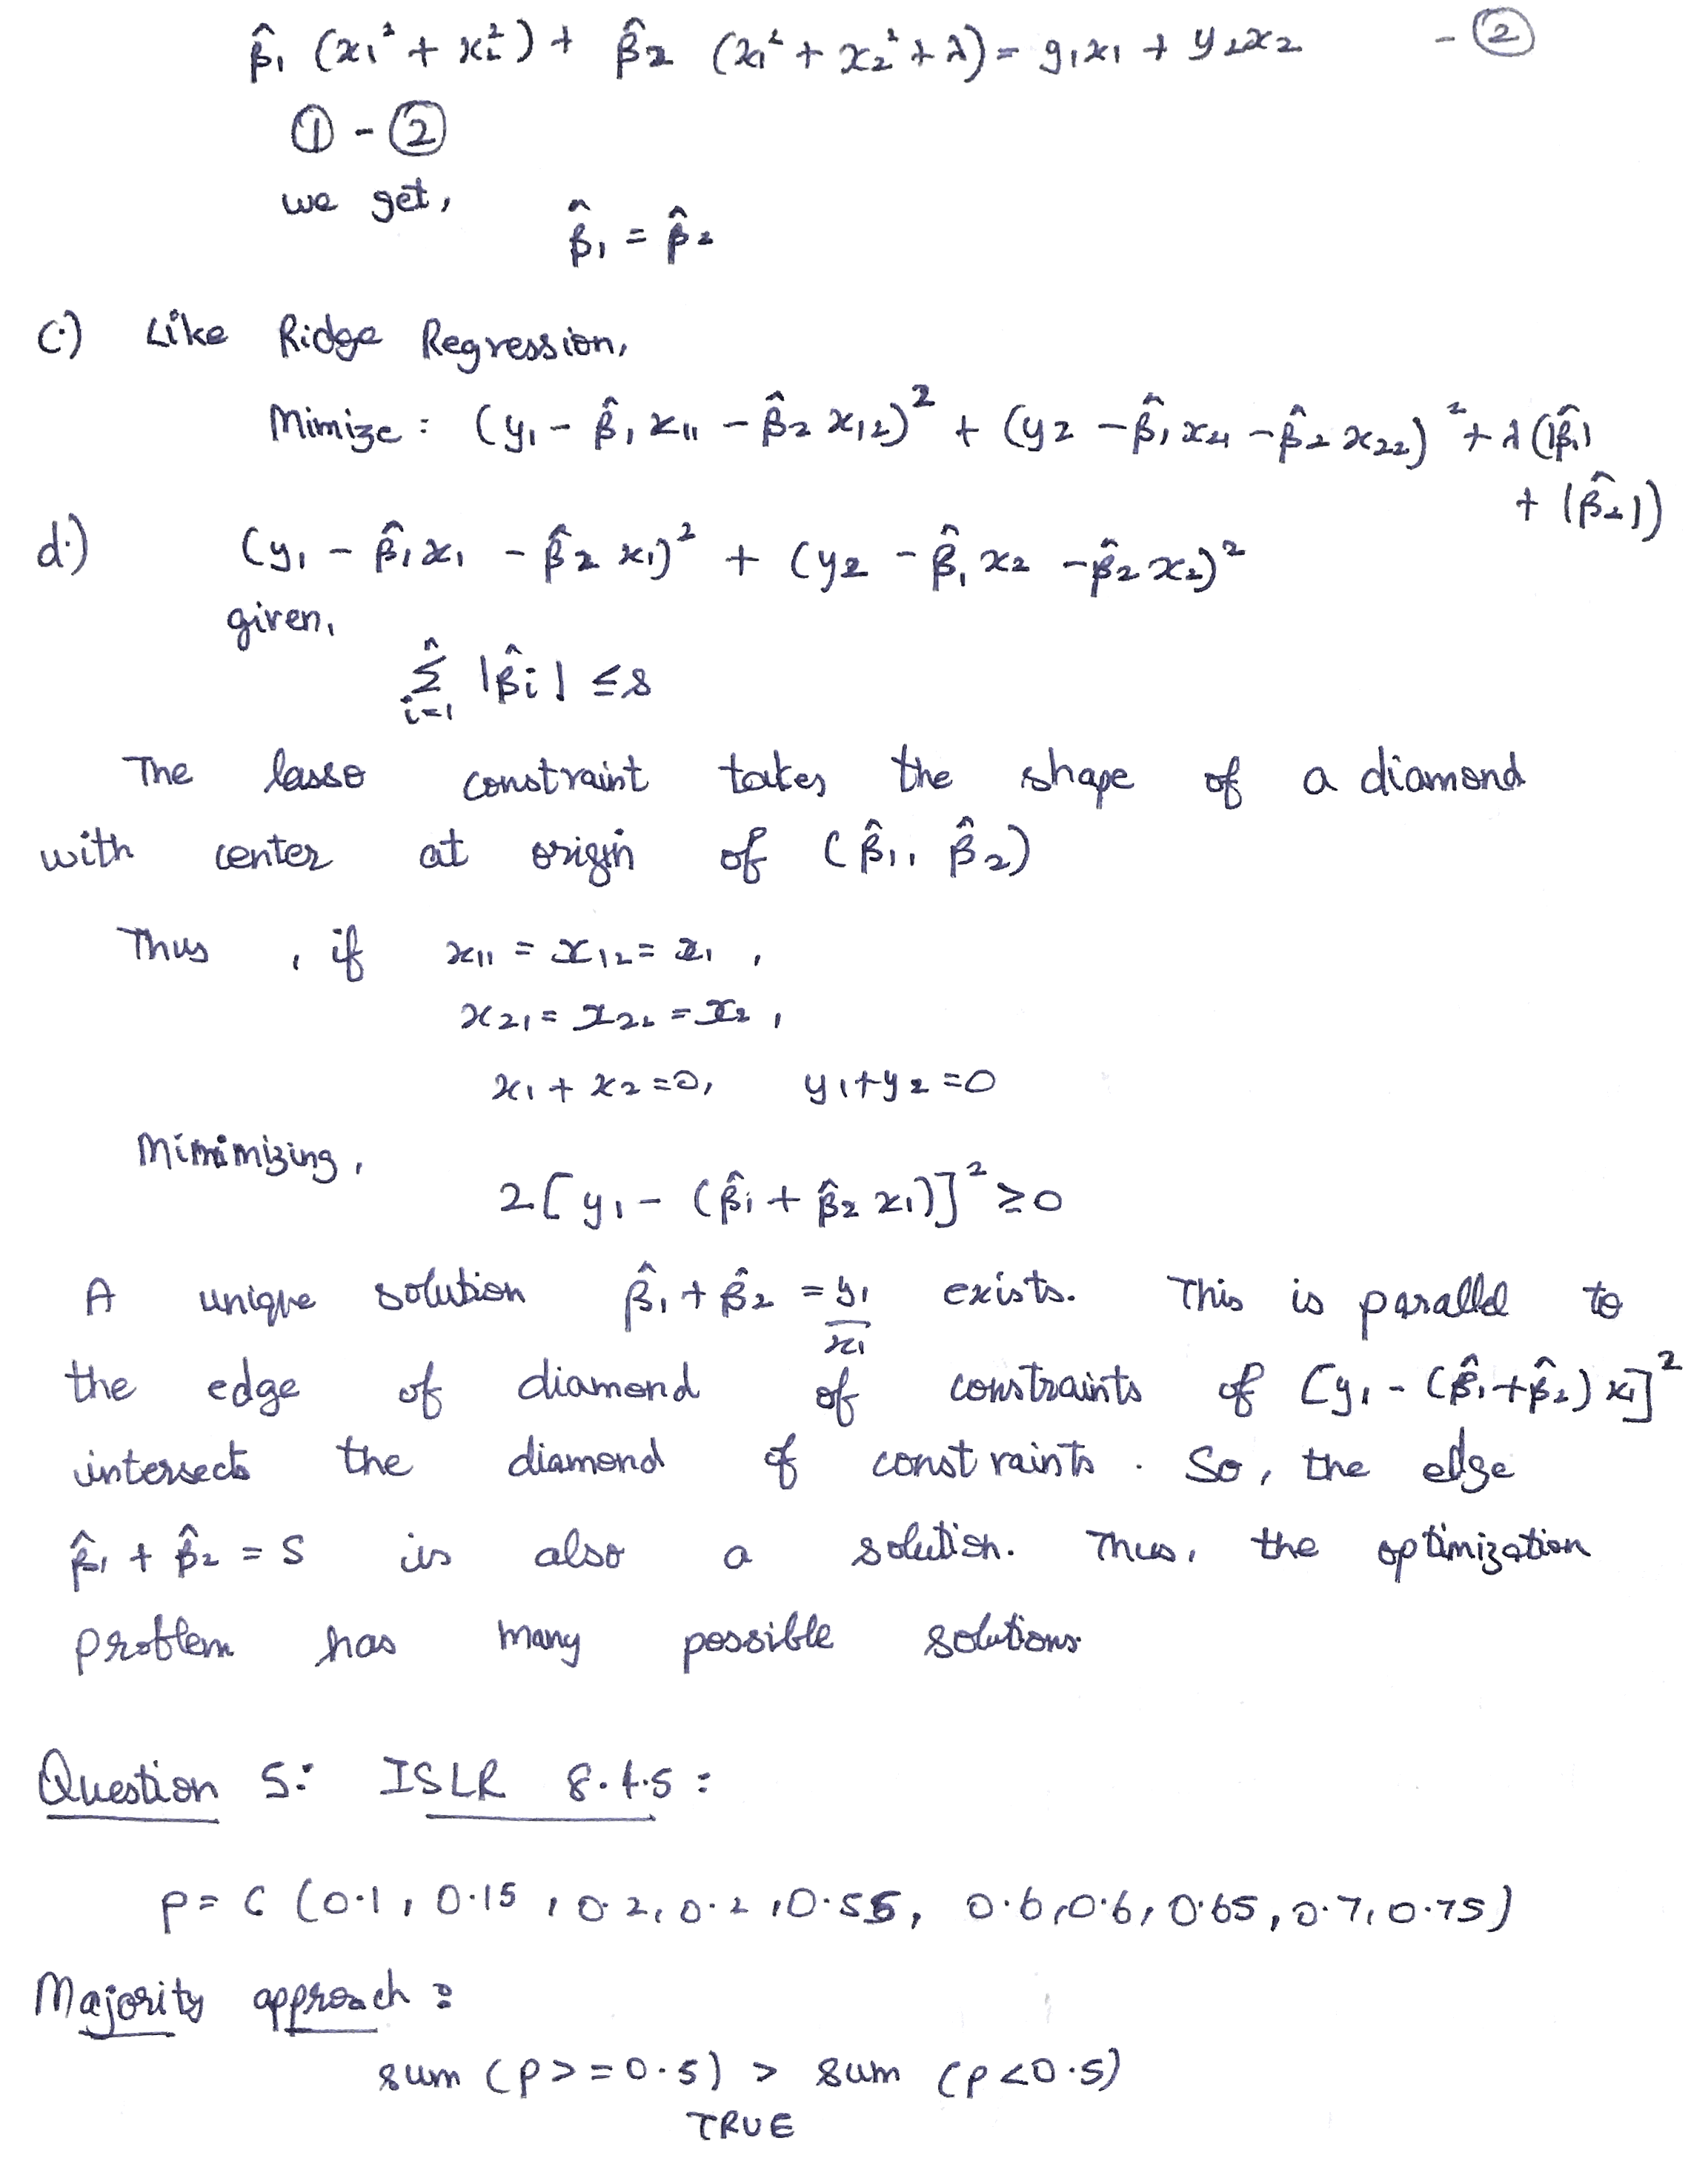

In [10]:
Image(filename='Page2.png')

<h2>6.) ISLR 9.7.3</h2>

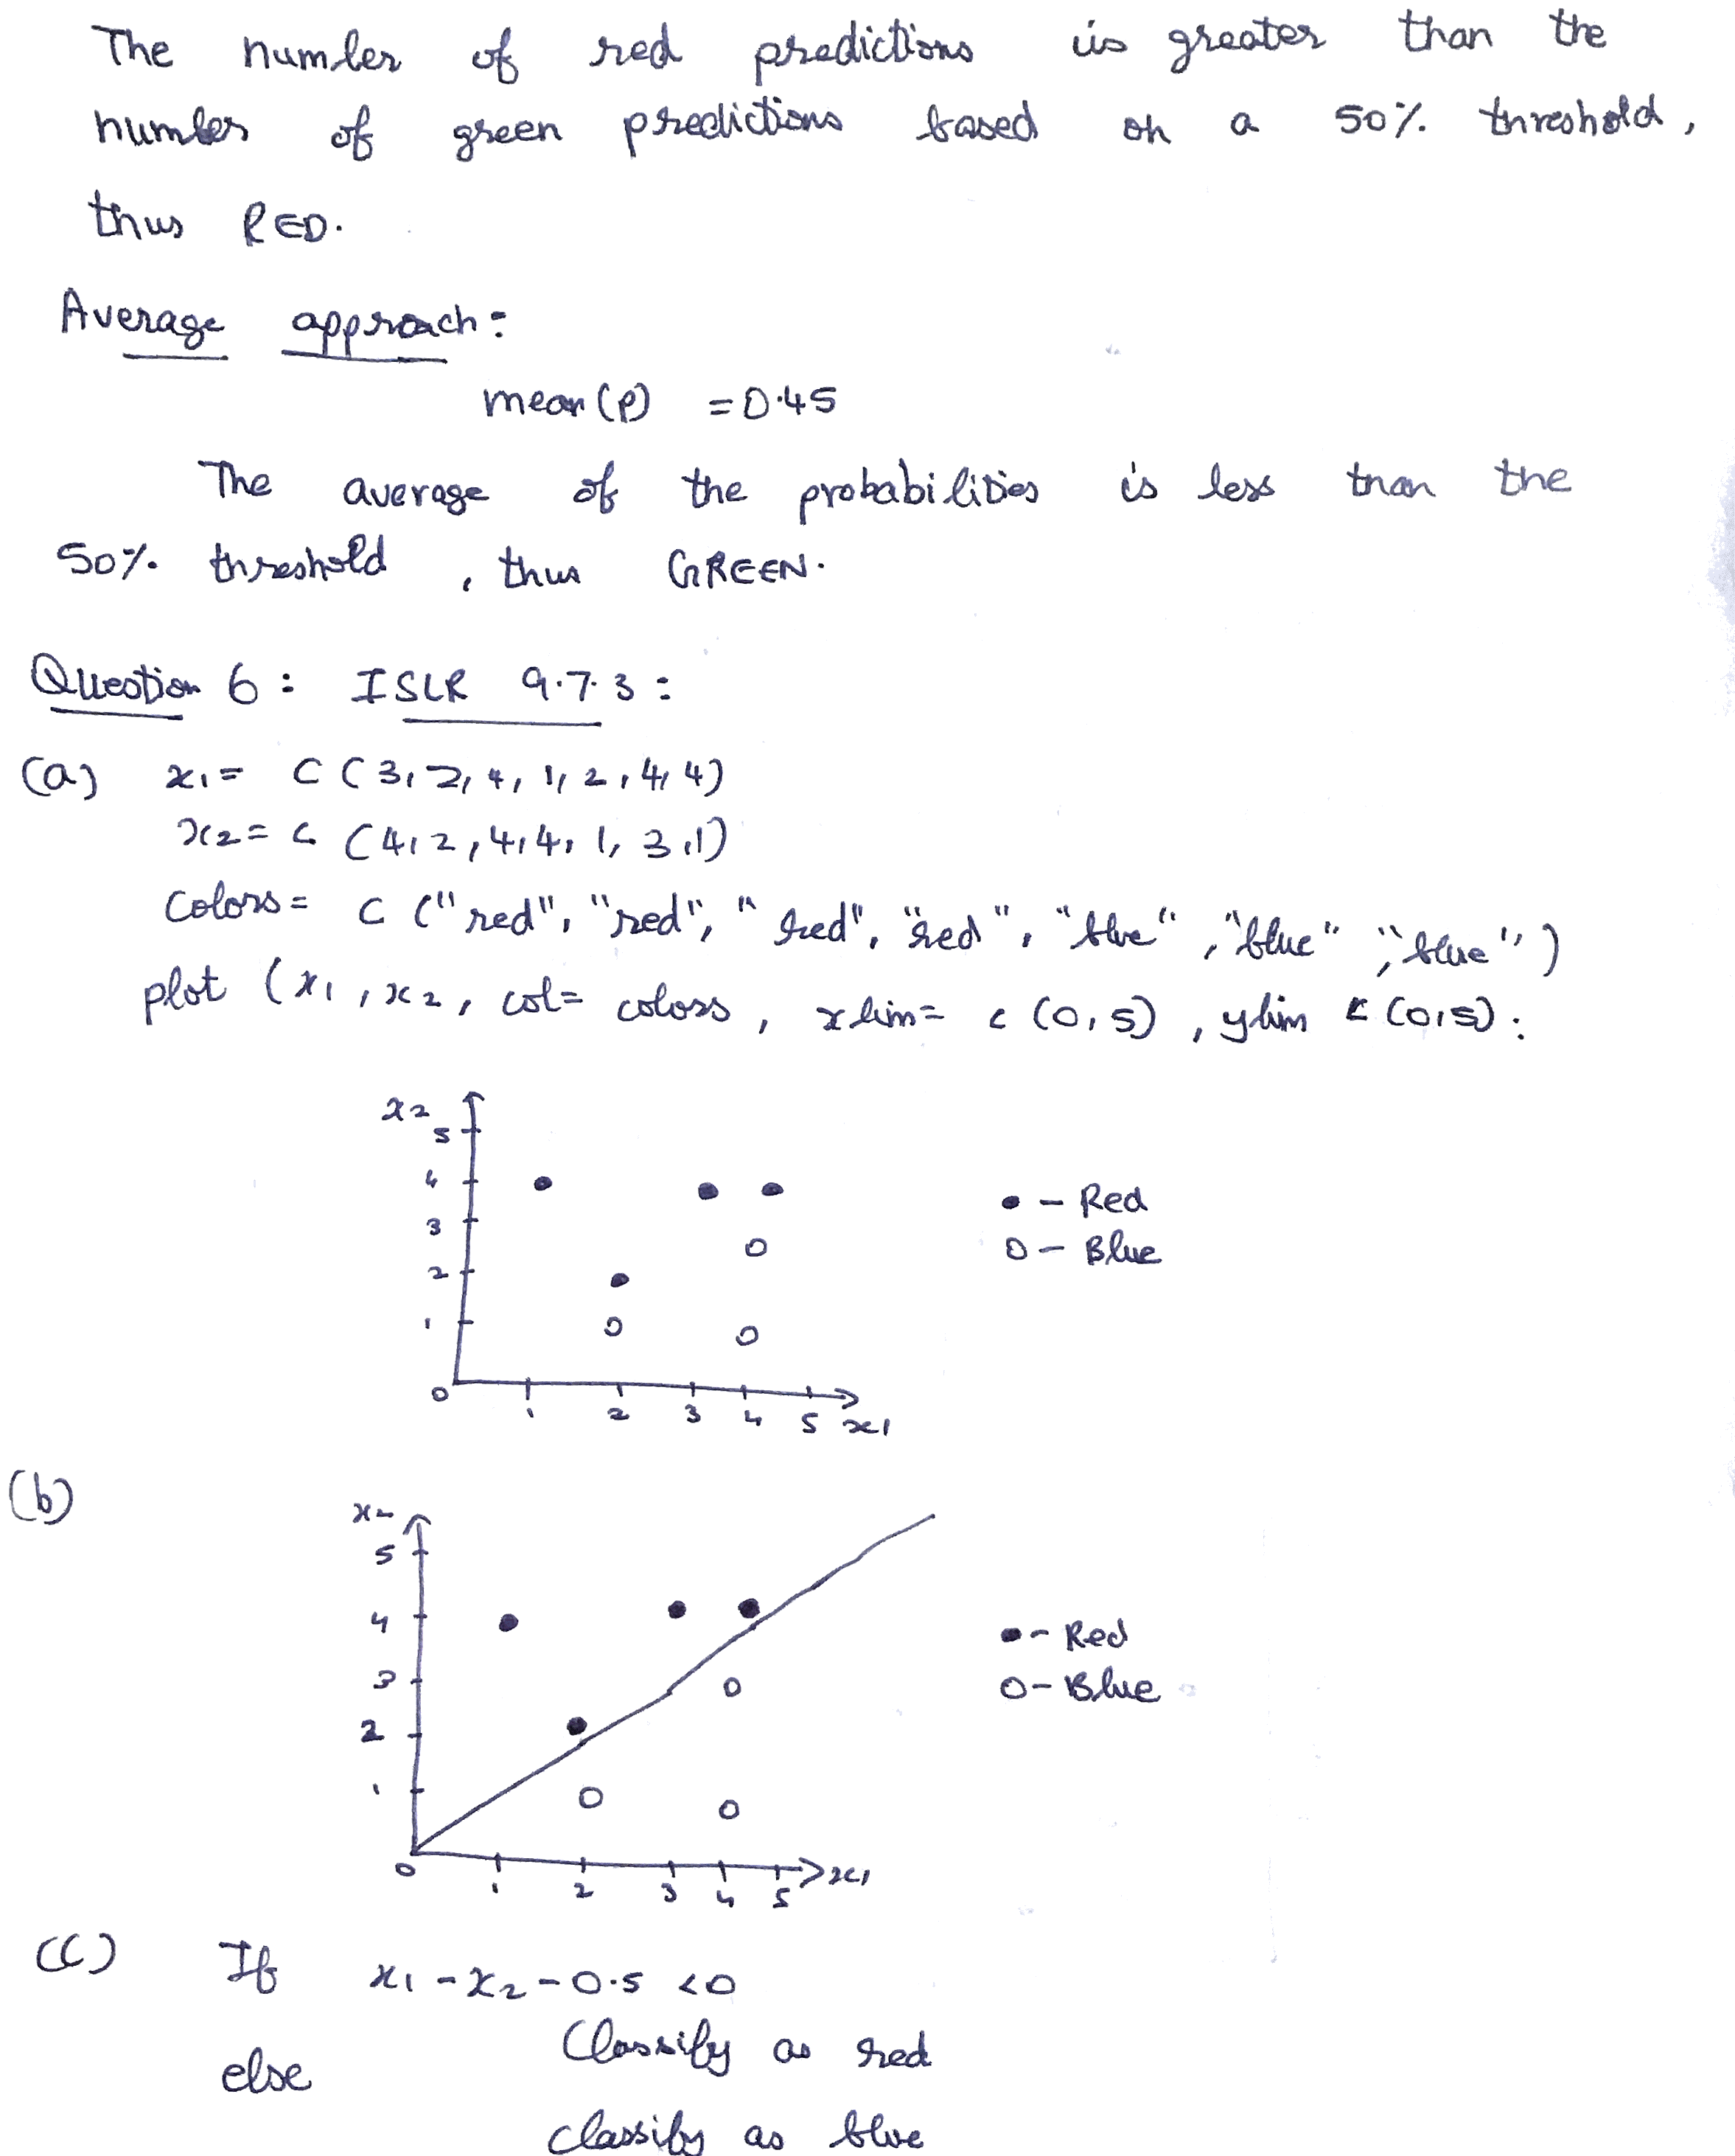

In [13]:
Image(filename='Page3.png')


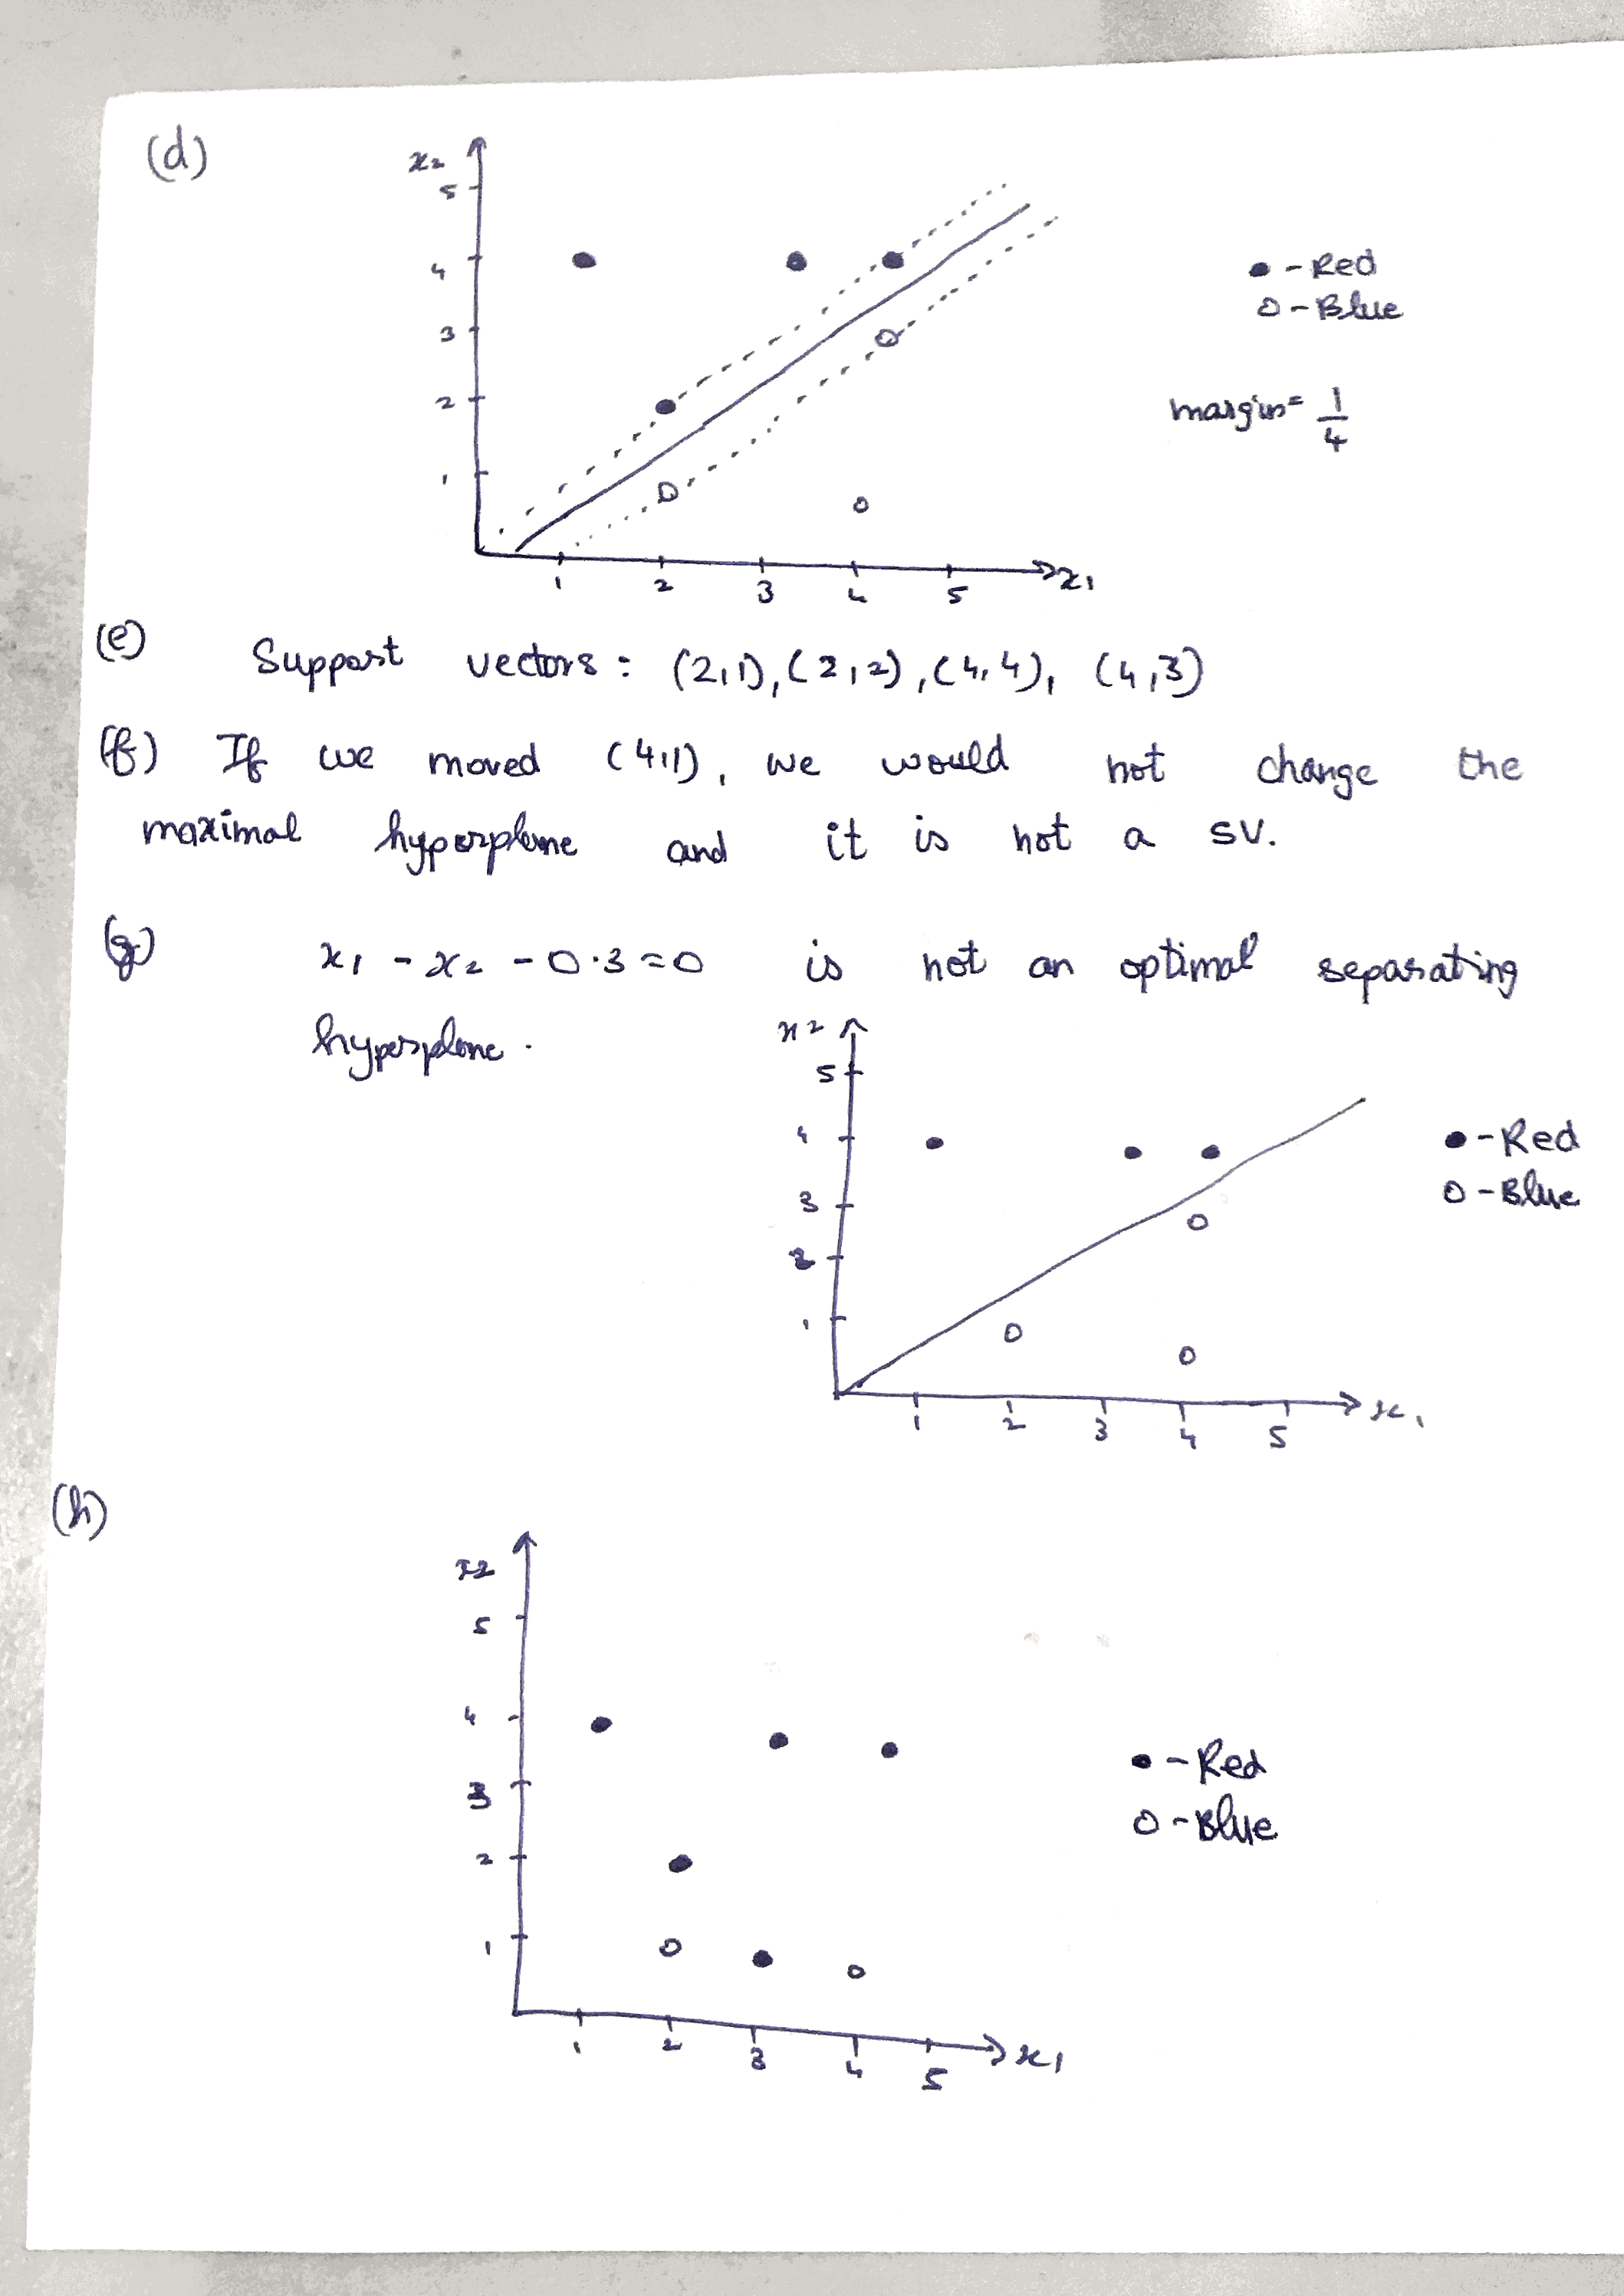

In [14]:
Image(filename='Page4.png')